# Table of Contents<a id ="Table of Contents"></a>

1. [Exploratory Data Analysis and Cleaning](#Exploratory-Data-Analysis-and-Cleaning)
2. [Phase 2 ](#Phase-2)
3. [Machine Learning Algorithms](#Machine-Learning-Algorithms)
4. [Naive Bayes](#Naive-Bayes)
5. [KNN](#KNN)
6. [Logistic Regression](#Logistic-Regression)
7. [DECISION TREES USING XGBOOST](#DECISION-TREES-USING-XGBOOST)
8. [Support Vector Machine](#Support-Vector-Machine)
9. [Random Forest](#Random-Forest)
10. [Model Selection](#Model-Selection)
11. [Recommendations and Project Extension Ideas](#Recommendations-and-Project-Extension-Ideas)

# Analysing Diabetic Patient Readmissions: Uncovering Patterns and Insights

Work Presented by
- Lawshia Priya Prabath 50500161 CSE 587
- Priya Ghanshyambhai Patel 50496355 CSE 587
- Meghna Umesh Deshnur 50496780 CSE 587

**Problem Statement:**
The problem at hand concerns the high rates of readmissions among diabetic patients, which not only impact
the well-being of the patients but also strain healthcare resources significantly. This analysis aims to
understand the factors contributing to frequent readmissions within specific age groups and genders,
focusing on uncovering patterns in diagnoses, treatment adherence, and admission types. By delving into
this data, the objective is to identify predictive markers for readmission risk and develop targeted
interventions and personalized care strategies to reduce readmission rates effectively.

**Background and Significance:**
High readmission rates among diabetic patients pose substantial challenges to healthcare providers. Factors
such as inadequate post-discharge support, medication non-compliance, and unresolved health issues
contribute to these recurrent admissions. Understanding the intricate patterns within the diabetic patient
population is crucial for providing timely and personalized interventions, reducing the emotional and
financial burden on patients, and optimizing the utilization of healthcare resources. By identifying specific
risk factors and tailoring interventions accordingly, we can significantly enhance patient care and outcomes
while also improving the efficiency and effectiveness of healthcare services, making this analysis highly
significant for both patients and healthcare providers.


**Project Potential**
This project is crucial in improving the care given to diabetic patients. By analysing patient data, doctors
can understand why some patients end up back in the hospital after being discharged. This insight allows
for personalized treatments, ensuring each patient receives the right care. By tailoring treatments, doctors
can make patients healthier faster, enhancing their overall well-being. Additionally, this approach helps
hospitals manage their resources effectively, saving both time and money. By reducing unnecessary hospital
visits, patients spend less, and hospitals use their funds efficiently, making healthcare more affordable and
sustainable. Ultimately, this project not only enhances individual patient outcomes but also contributes to
the overall efficiency and effectiveness of healthcare services.

In [53]:
#loading required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score #plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [54]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


### Loading Dataset

In [55]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [56]:
df['A1Cresult'].isnull().sum()

84748

In [57]:
null_counts = df.isna().sum()
null_counts

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

[Table of contents](#Table-of-Contents)
# Exploratory Data Analysis and Cleaning<a id="Exploratory Data Analysis and Cleaning"></a>

### Step 1:
Shape of the dataset


In [58]:
print(f'Number of rows in the dataset are: {df.shape[0]}')
print(f'Number of columns in the dataset are: {df.shape[1]}')

Number of rows in the dataset are: 101766
Number of columns in the dataset are: 50


### Step 2:
Name of features in the dataset


In [59]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Step 3:
Finding the rows with same patient_id and retrive the latest 'encounter_id' for each patient


In [60]:
max_encounter_rows = df.groupby('patient_nbr')['encounter_id'].idxmax()

# Retrieve the corresponding rows from the original DataFrame
df = df.loc[max_encounter_rows]
df.reset_index(drop= True)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,26264286,135,Caucasian,Female,[50-60),?,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,>30
1,29758806,378,Caucasian,Female,[50-60),?,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
2,189899286,729,Caucasian,Female,[80-90),?,1,3,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
3,64331490,774,Caucasian,Female,[80-90),?,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,NO
4,14824206,927,AfricanAmerican,Female,[30-40),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,418513058,189351095,Caucasian,Female,[80-90),?,1,1,7,1,...,No,No,No,No,No,No,No,No,No,NO
71514,359719064,189365864,Other,Male,[60-70),?,1,1,7,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
71515,338462954,189445127,Caucasian,Female,[80-90),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
71516,443811536,189481478,Caucasian,Female,[40-50),?,1,4,7,14,...,No,Down,No,No,No,No,No,Ch,Yes,>30


### Step 4:
Remove features with missing values more than 50% i.e. Weight, Medical speciality, payer code

In [61]:
value_counts = df['payer_code'].value_counts()
total_count = len(df)
percentages = (value_counts / total_count) * 100

# Create a new DataFrame to display the value count and percentage of payer
result_df = pd.DataFrame({'Payer': value_counts.index, 'Count': value_counts, 'Percentage': percentages}).reset_index(drop= True)

# Display the result
result_df

,Payer,Count,Percentage
0,?,30085,42.066333
1,MC,21280,29.754747
2,HM,4141,5.790151
3,BC,3424,4.787606
4,SP,3216,4.496770
5,MD,2265,3.167035
6,CP,1913,2.674851
7,UN,1888,2.639895
8,CM,1426,1.993904
9,OG,656,0.917252


In [62]:
# Value counts and percentage of each for weight
value_counts = df['weight'].value_counts()
total_count = len(df)
percentages = (value_counts / total_count) * 100

# Create a new DataFrame to display the results
result_df = pd.DataFrame({'weight': value_counts.index, 'Count': value_counts, 'Percentage': percentages}).reset_index(drop= True)

# Display the result
result_df

,weight,Count,Percentage
0,?,68671,96.019184
1,[75-100),1197,1.673705
2,[50-75),792,1.107414
3,[100-125),556,0.777427
4,[125-150),132,0.184569
5,[25-50),88,0.123046
6,[0-25),37,0.051735
7,[150-175),34,0.047540
8,[175-200),9,0.012584
9,>200,2,0.002796


In [63]:
# Value counts and percentage of each type for medical_specialty
value_counts = df['medical_specialty'].value_counts()
total_count = len(df)
percentages = round((value_counts / total_count) * 100, 2)

# Create a new DataFrame to display the results
result_df = pd.DataFrame({'medical_specialty': value_counts.index, 'Count': value_counts, 'Percentage': percentages}).reset_index(drop= True)

# Display the result
result_df


,medical_specialty,Count,Percentage
0,?,34525,48.27
1,InternalMedicine,11069,15.48
2,Family/GeneralPractice,5021,7.02
3,Emergency/Trauma,4463,6.24
4,Cardiology,4143,5.79
...,...,...,...
65,Pediatrics-InfectiousDiseases,1,0.00
66,Speech,1,0.00
67,Perinatology,1,0.00
68,Neurophysiology,1,0.00


In [64]:
df = df.drop(['weight','medical_specialty','payer_code'],axis=1)

### Step 5: 
Removing all the redundant features


In [65]:
df = df.drop(['encounter_id','patient_nbr','diag_1','diag_2', 'diag_3','admission_source_id','discharge_disposition_id'],axis=1)
df.head()

,race,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4780,Caucasian,Female,[50-60),1,3,31,1,14,0,0,...,No,No,No,No,No,No,No,Ch,Yes,>30
5827,Caucasian,Female,[50-60),3,2,49,1,11,0,0,...,No,No,No,No,No,No,No,No,No,NO
67608,Caucasian,Female,[80-90),1,4,68,2,23,0,0,...,No,No,No,No,No,No,No,No,Yes,NO
17494,Caucasian,Female,[80-90),1,3,46,0,20,0,0,...,No,No,No,No,No,No,No,Ch,Yes,NO
2270,AfricanAmerican,Female,[30-40),1,5,49,0,5,0,0,...,No,No,No,No,No,No,No,No,Yes,NO


### Step 6: 
Converting "Not available" and "Not mapped" in admission type to NA


In [66]:
df['admission_type_id'].value_counts()

admission_type_id
1    37191
3    13823
2    13032
6     4282
5     2859
8      303
7       19
4        9
Name: count, dtype: int64

In [67]:
df['admission_type_id'] = df['admission_type_id'].replace(5, None)
df['admission_type_id'] = df['admission_type_id'].replace(6, None)
df['admission_type_id'] = df['admission_type_id'].replace(8, None)
print(df['admission_type_id'].value_counts())
print(f"no of null values: {df['admission_type_id'].isna().sum()}")

admission_type_id
1    37191
3    13823
2    13032
7       19
4        9
Name: count, dtype: int64
no of null values: 7444


In [68]:
df['A1Cresult'] = df['A1Cresult'].replace('None', None)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', None)

### Step 7:
Looking at the distrubition in gender and Dropping unknown values in gender column

In [69]:
df['gender'].value_counts()

gender
Female             38023
Male               33492
Unknown/Invalid        3
Name: count, dtype: int64

### Step 8:
Bar plot of gender with readmitted as hue to look at the distribution of gender with respect to readmitted


<Axes: xlabel='readmitted', ylabel='count'>

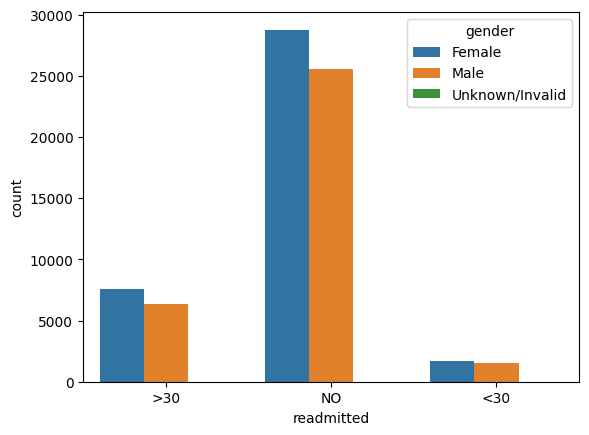

In [70]:
sns.countplot(x=df['readmitted'], hue = df['gender'])

In [71]:
df = df.loc[(df['gender'] == 'Female') | (df['gender'] == 'Male')]
df.reset_index(drop= True)

,race,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[50-60),1,3,31,1,14,0,0,...,No,No,No,No,No,No,No,Ch,Yes,>30
1,Caucasian,Female,[50-60),3,2,49,1,11,0,0,...,No,No,No,No,No,No,No,No,No,NO
2,Caucasian,Female,[80-90),1,4,68,2,23,0,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Female,[80-90),1,3,46,0,20,0,0,...,No,No,No,No,No,No,No,Ch,Yes,NO
4,AfricanAmerican,Female,[30-40),1,5,49,0,5,0,0,...,No,No,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71510,Caucasian,Female,[80-90),1,1,73,1,11,0,0,...,No,No,No,No,No,No,No,No,No,NO
71511,Other,Male,[60-70),1,3,56,1,8,0,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
71512,Caucasian,Female,[80-90),1,3,39,0,18,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
71513,Caucasian,Female,[40-50),1,14,69,0,16,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30


### Step 9:
Converting gender column from categorical to binary

In [72]:
#convert gender column to female binary column when gender = 'Female'
df['is_female'] = (df['gender'] == 'Female').astype(int)
df['is_female'].value_counts()

is_female
1    38023
0    33492
Name: count, dtype: int64

In [73]:
df['gender'].value_counts()

gender
Female    38023
Male      33492
Name: count, dtype: int64

In [74]:
#dropping the gender column from dataset
column = 'gender'
if column in df.columns:
    df = df.drop(['gender'],axis=1)
else:
    pass

### Step 10: 
Converting age feature from interval/bin to numeric values

In [75]:
def mid_ages(x):
    x_1 = x.split('-')[0].split('[')[1]
    x_2 = x.split('-')[1].split(')')[0]
    return 0.5*(int(x_1) + int(x_2))

df['age'] = df['age'].map(lambda x: mid_ages(x))


### Step 11:
Histplot of age count 

(array([  153.,   525.,  1111.,  2650.,  6756., 12349., 15907., 18160.,
        11864.,  2040.]),
 array([ 5., 14., 23., 32., 41., 50., 59., 68., 77., 86., 95.]),
 <BarContainer object of 10 artists>)

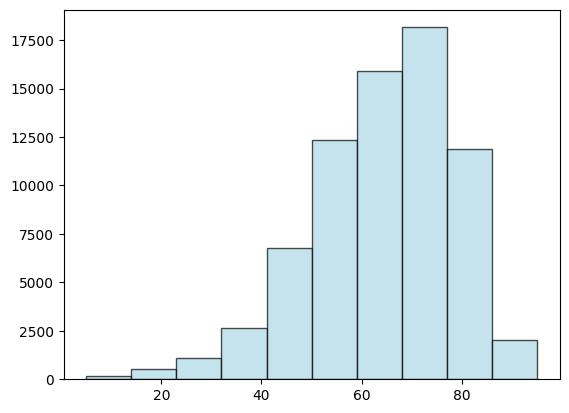

In [76]:
plt.hist(df['age'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)

### Step 12:
Converting readmitted column to ordinal such that `No` = 0,  `< 30 days` = 2,  `> 30 days` = 1


In [77]:
df['readmitted'].value_counts()

readmitted
NO     54371
>30    13920
<30     3224
Name: count, dtype: int64

In [78]:
df['readmitted'] = df['readmitted'].replace('NO', 0 )
df['readmitted'] = df['readmitted'].replace('>30', 1 )
df['readmitted'] = df['readmitted'].replace('<30', 2 )
print(df['readmitted'].value_counts())

readmitted
0    54371
1    13920
2     3224
Name: count, dtype: int64


### Step 13:
Bar graph to understand the amount of null values for each column


In [79]:
null_counts = df.isnull().sum()
null_counts

race                            0
age                             0
admission_type_id            7444
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum               68038
A1Cresult                   59117
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton   

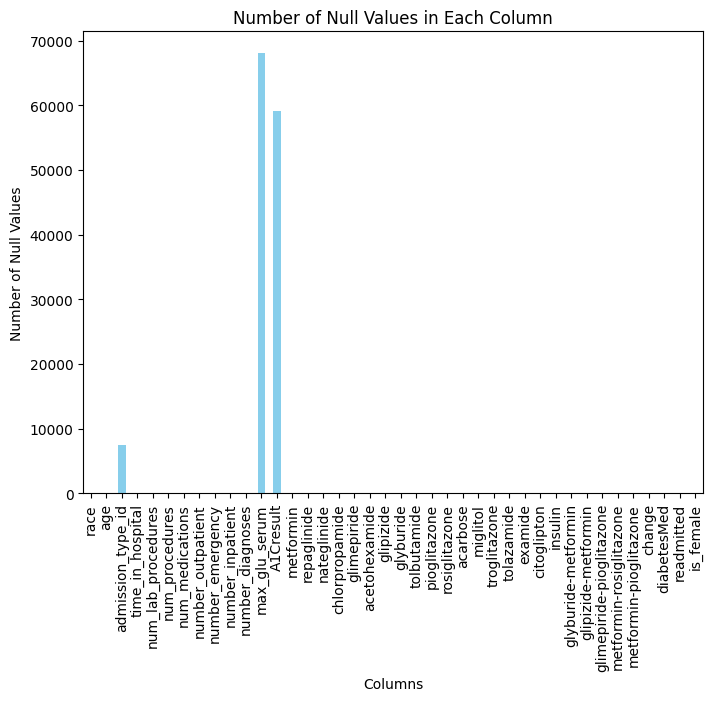

In [80]:
# Create a bar graph
plt.figure(figsize=(8, 6))
null_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Column')

# Show the plot
plt.show()

### Step 14:
Since we have high percentage of patients not undergoing glucose serum test or A1C test, we are dropping the column as no insight can be generated from them


In [81]:
df = df.drop(['max_glu_serum', 'A1Cresult'],axis=1)

### Step 15:
Converting the medication columns to ordinal
No drug prescribed = 0
Decreased dose = 1
Steady dose = 2
Increased dose = 3

In [82]:

med_list = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']

for ele in med_list:
    df[ele] = df[ele].replace('No', 0 )
    df[ele] = df[ele].replace('Down', 1 )
    df[ele] = df[ele].replace('Steady', 2 )
    df[ele] = df[ele].replace('Up', 3 )
    print('\033[1m'+f'columns: {ele}' +'\033[0m')
    print(df[ele].value_counts())

columns: metformin
metformin
0    56942
2    13346
3      798
1      429
Name: count, dtype: int64
columns: repaglinide
repaglinide
0    70545
2      857
3       78
1       35
Name: count, dtype: int64
columns: nateglinide
nateglinide
0    71029
2      459
3       18
1        9
Name: count, dtype: int64
columns: chlorpropamide
chlorpropamide
0    71449
2       61
3        4
1        1
Name: count, dtype: int64
columns: glimepiride
glimepiride
0    67830
2     3306
3      242
1      137
Name: count, dtype: int64
columns: acetohexamide
acetohexamide
0    71514
2        1
Name: count, dtype: int64
columns: glipizide
glipizide
0    62709
2     7904
3      552
1      350
Name: count, dtype: int64
columns: glyburide
glyburide
0    63986
2     6555
3      586
1      388
Name: count, dtype: int64
columns: tolbutamide
tolbutamide
0    71496
2       19
Name: count, dtype: int64
columns: pioglitazone
pioglitazone
0    66306
2     4956
3      167
1       86
Name: count, dtype: int64
columns: rosig

### Step 16:
Converting diabetesMed and change columns to binary values


In [83]:
print('\033[1m'+'Before'+'\033[0m')
print(df['diabetesMed'].value_counts())
df['diabetesMed'] = df['diabetesMed'].replace('No', 0 )
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1 )
print('\033[1m'+'After'+'\033[0m')
print(df['diabetesMed'].value_counts())

#Column name: diabetesMed
print('\033[1m'+'Before'+'\033[0m')
print(df['change'].value_counts())
df['change'] = df['change'].replace('No', 0 )
df['change'] = df['change'].replace('Ch', 1 )
print('\033[1m'+'After'+'\033[0m')
print(df['change'].value_counts())

Before
diabetesMed
Yes    54194
No     17321
Name: count, dtype: int64
After
diabetesMed
1    54194
0    17321
Name: count, dtype: int64
Before
change
No    39509
Ch    32006
Name: count, dtype: int64
After
change
0    39509
1    32006
Name: count, dtype: int64


### Step 17:
Creating dummy variable for categorical column race

In [84]:
df['race'].value_counts()

#converting '?' to None
df['race'] = df['race'].replace('?', None )

df = pd.get_dummies(df, columns=['race'], prefix=['race_'], dtype=int)
df.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,readmitted,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other
4780,55.0,1,3,31,1,14,0,0,1,5,...,0,1,1,1,1,0,0,1,0,0
5827,55.0,3,2,49,1,11,0,0,0,3,...,0,0,0,0,1,0,0,1,0,0
67608,85.0,1,4,68,2,23,0,0,0,9,...,0,0,1,0,1,0,0,1,0,0
17494,85.0,1,3,46,0,20,0,0,0,9,...,0,1,1,0,1,0,0,1,0,0
2270,35.0,1,5,49,0,5,0,0,0,3,...,0,0,1,0,1,1,0,0,0,0


### Step 18
Removing rows with na


In [85]:
print(f'Shape of dataframe before dropping: {df.shape}')
df = df.dropna()
print(f'Shape of dataframe after dropping: {df.shape}')

Shape of dataframe before dropping: (71515, 42)
Shape of dataframe after dropping: (64071, 42)


### Step 19:
Converting object type column to integer


In [86]:
df['admission_type_id'] = df['admission_type_id'].astype(int)

### Step 20:
Getting count, min, max, mean, std of numeric values

In [87]:
df.describe()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,readmitted,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other
count,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,...,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000,64071.000000
mean,65.810975,1.637059,4.325264,43.538465,1.395296,15.820215,0.305879,0.139564,0.464844,7.382544,...,0.000031,0.450188,0.760157,0.276990,0.532737,0.189040,0.007070,0.740678,0.019400,0.016076
std,16.031157,0.820014,2.982932,19.436483,1.744842,8.325582,1.143377,0.686875,0.992311,1.972077,...,0.007901,0.497516,0.426991,0.536236,0.498931,0.391544,0.083788,0.438266,0.137929,0.125769
min,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,2.000000,33.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,1.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,75.000000,2.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,95.000000,7.000000,14.000000,126.000000,6.000000,81.000000,40.000000,54.000000,16.000000,16.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 21:
Getting correlation matrix

In [88]:
corr_mat = df.corr(numeric_only = True)
corr_mat

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,readmitted,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other
age,1.000000,-0.038838,0.130373,0.046520,-0.026393,0.057845,0.028403,-0.048861,0.027282,0.266541,...,-0.000200,-0.031921,-0.024826,0.052594,0.053290,-0.154994,0.000495,0.165466,-0.065632,-0.024348
admission_type_id,-0.038838,1.000000,-0.005107,-0.268839,0.265768,0.161137,-0.017531,-0.042524,-0.044376,-0.105379,...,0.006566,0.019001,0.004756,-0.034213,-0.016356,-0.083421,0.005318,0.070214,-0.009089,0.004212
time_in_hospital,0.130373,-0.005107,1.000000,0.335398,0.177444,0.463681,-0.003169,-0.001687,0.087023,0.234401,...,0.002218,0.111776,0.064253,0.039426,0.026048,0.012741,-0.013885,0.001197,-0.018297,-0.009362
num_lab_procedures,0.046520,-0.268839,0.335398,1.000000,0.028495,0.266836,0.016735,0.025624,0.052976,0.169242,...,-0.004175,0.083851,0.049511,0.061766,0.002267,0.012554,-0.016819,-0.005457,-0.013183,-0.004933
num_procedures,-0.026393,0.265768,0.177444,0.028495,1.000000,0.396308,-0.017446,-0.044483,-0.058081,0.069768,...,-0.000895,0.008937,-0.003320,-0.022275,-0.064357,-0.040319,-0.001609,0.040838,-0.023241,0.011582
num_medications,0.057845,0.161137,0.463681,0.266836,0.396308,1.000000,0.035761,0.010878,0.059948,0.260758,...,0.001983,0.249482,0.189411,0.044688,0.010989,-0.036295,-0.030643,0.054247,-0.037820,-0.014903
number_outpatient,0.028403,-0.017531,-0.003169,0.016735,-0.017446,0.035761,1.000000,0.096185,0.098620,0.098091,...,-0.001057,0.015426,0.011044,0.093185,0.014758,-0.045665,-0.011170,0.057254,-0.009720,-0.011294
number_emergency,-0.048861,-0.042524,-0.001687,0.025624,-0.044483,0.010878,0.096185,1.000000,0.202048,0.059839,...,-0.000803,0.031945,0.023345,0.088698,0.020734,0.029633,-0.007383,-0.017688,0.002228,0.003478
number_inpatient,0.027282,-0.044376,0.087023,0.052976,-0.058081,0.059948,0.098620,0.202048,1.000000,0.120559,...,-0.001851,0.017232,0.027637,0.179289,0.010797,0.016141,-0.011934,0.007837,-0.006591,-0.017232
number_diagnoses,0.266541,-0.105379,0.234401,0.169242,0.069768,0.260758,0.098091,0.059839,0.120559,1.000000,...,-0.006776,0.048677,0.019139,0.125897,0.003515,-0.084460,-0.010324,0.113787,-0.034916,-0.010762


### Step 22:
Getting heatmap from corr_mat

<Axes: >

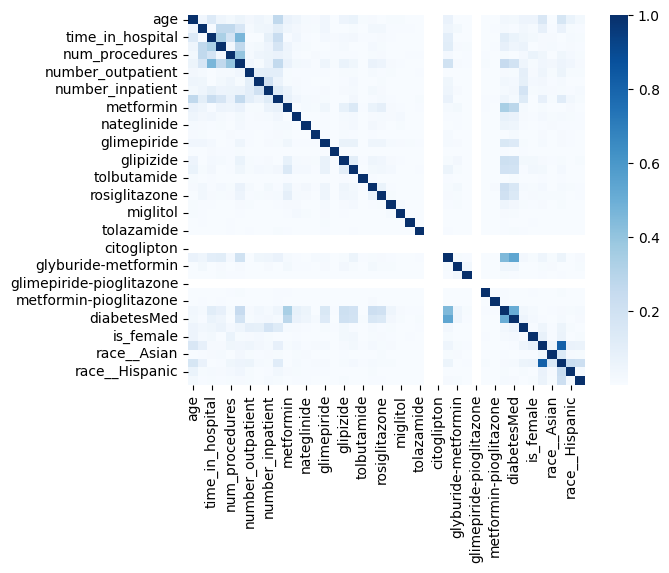

In [89]:
sns.heatmap(abs(corr_mat), cmap= 'Blues')

### Step 23:
Bar plot of categorical columns


In [90]:
df.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,readmitted,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other
4780,55.0,1,3,31,1,14,0,0,1,5,...,0,1,1,1,1,0,0,1,0,0
5827,55.0,3,2,49,1,11,0,0,0,3,...,0,0,0,0,1,0,0,1,0,0
67608,85.0,1,4,68,2,23,0,0,0,9,...,0,0,1,0,1,0,0,1,0,0
17494,85.0,1,3,46,0,20,0,0,0,9,...,0,1,1,0,1,0,0,1,0,0
2270,35.0,1,5,49,0,5,0,0,0,3,...,0,0,1,0,1,1,0,0,0,0


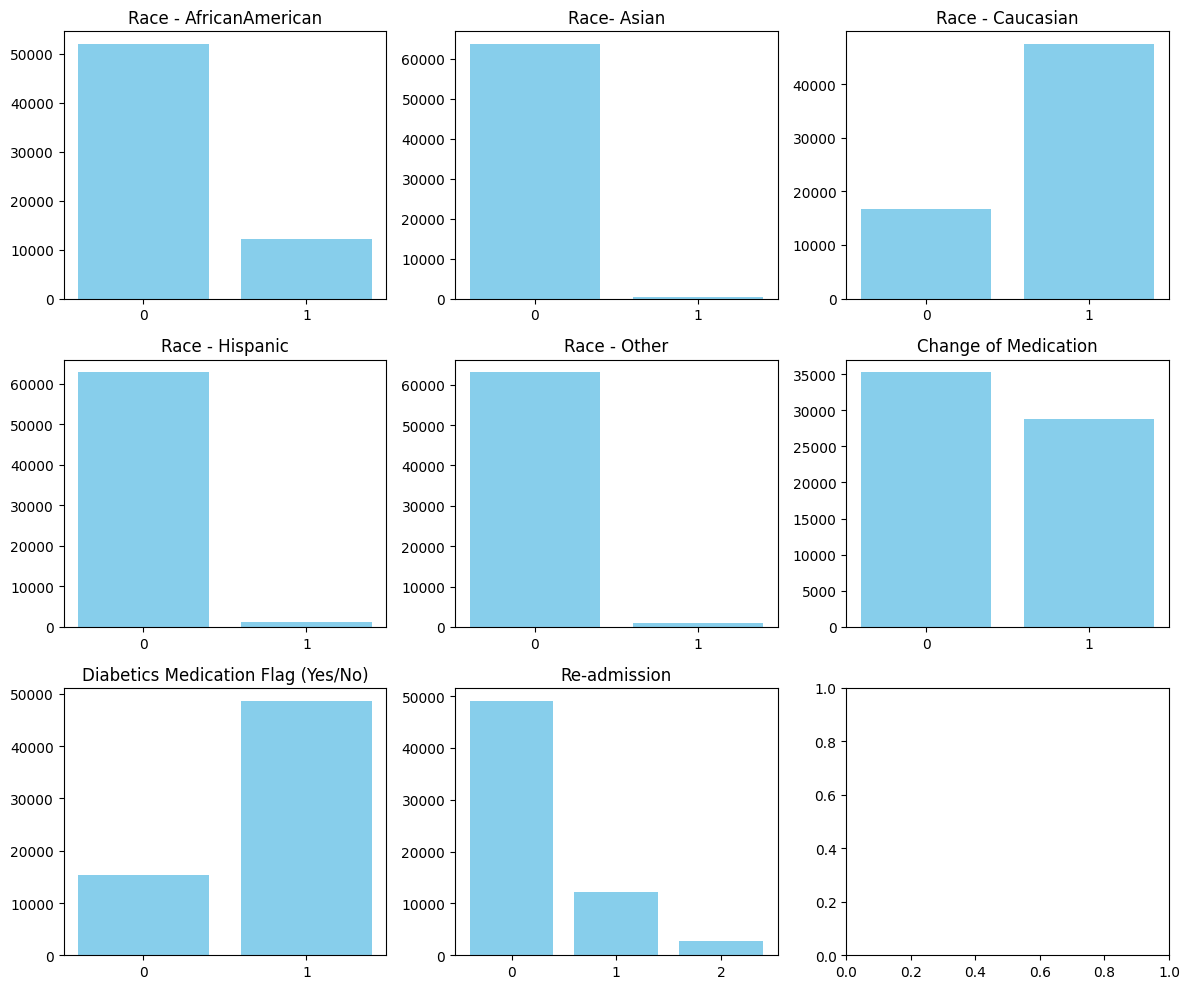

In [91]:
categ_list = ['race__AfricanAmerican','race__Asian','race__Caucasian','race__Hispanic','race__Other','change', 'diabetesMed', 'readmitted']
title_list = ['Race - AfricanAmerican','Race- Asian','Race - Caucasian','Race - Hispanic','Race - Other','Change of Medication', 'Diabetics Medication Flag (Yes/No)', 'Re-admission']


fig, axs = plt.subplots(3, 3, figsize=(12, 10))

index_list = [[0, 0], [0, 1], [0, 2],
              [1, 0], [1, 1], [1, 2],
              [2, 0], [2, 1], [2, 2]]

for idx, ele in enumerate(categ_list):  
    ax = axs[index_list[idx][0], index_list[idx][1]]
    value_counts = df[ele].value_counts().sort_index()
    
    ax.bar(value_counts.index.astype(str), value_counts, color='skyblue')
    ax.set_title(title_list[idx], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Step 24:
Medication distribution


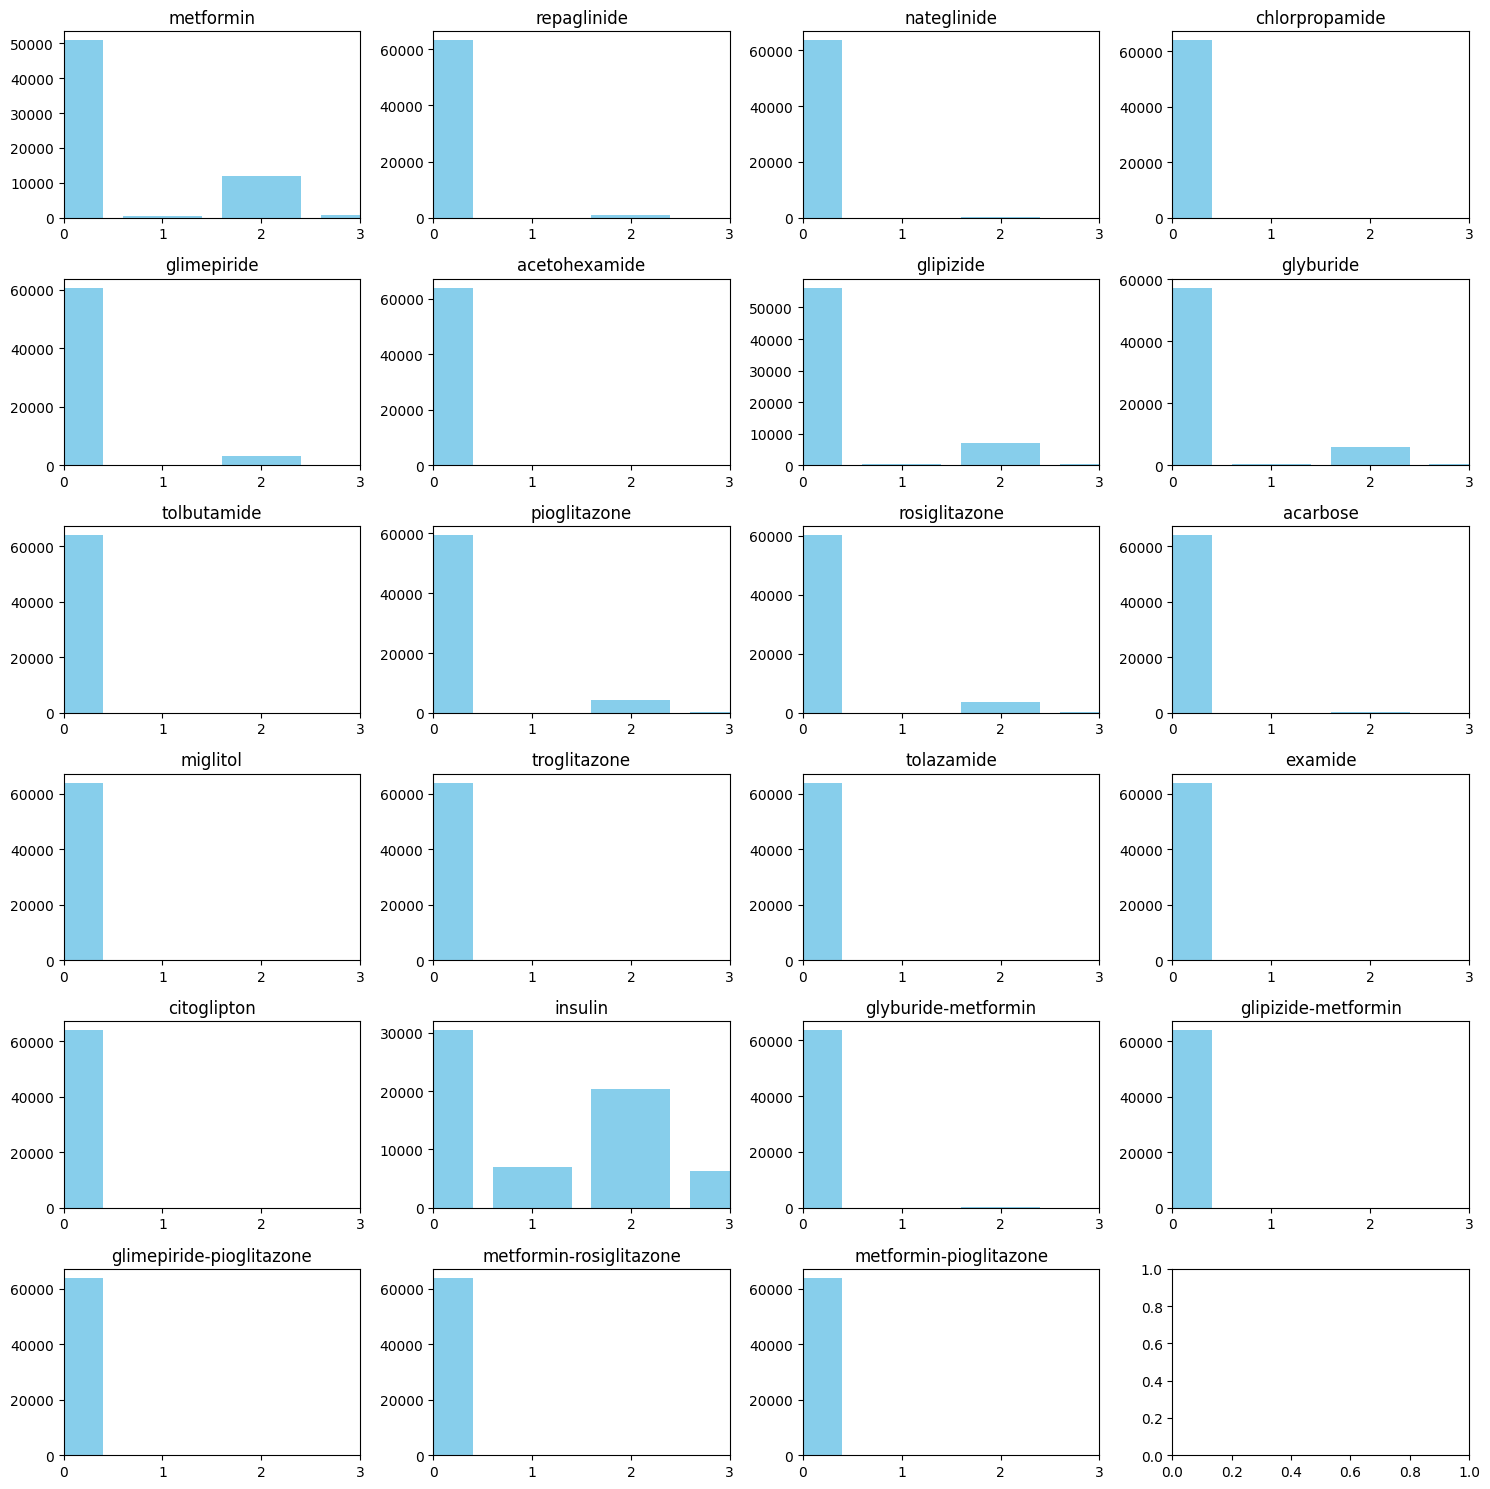

In [92]:
df_graph = df.copy(deep=True)
# Create a figure with the specified layout
fig, axs = plt.subplots(6, 4, figsize=(15, 15))

#to make it easy to set the axes
axs= axs.ravel()

for idx, ele in enumerate(med_list):
    ax = axs[idx]
    df_graph[ele] = df_graph[ele].astype(object)
    value_counts = df_graph[ele].value_counts()
    ax.bar(value_counts.index, value_counts, label='Fitting', color='skyblue')
    ax.set_title(med_list[idx], fontsize=12)
    ax.set_xlim(0, 3)
    ax.set_xticks([0,1,2,3])

# Show the plot
plt.tight_layout()
plt.show()


### Step 25:
Pairplot of numeric features

In [93]:
if False:
    sns.pairplot(df, kind = 'scatter', hue = 'readmitted')

In [94]:
df.shape
print(f'Number of rows in the dataset are: {df.shape[0]}')
print(f'Number of columns in the dataset are: {df.shape[1]}')

Number of rows in the dataset are: 64071
Number of columns in the dataset are: 42


[Table of contents](#Table-of-Contents)
# Phase 2<a id="Phase 2"></a>

# Scaling Data

In [95]:
# Rearranging features in such a way that the class is last column
df = df.loc[:, ['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 
       'is_female', 'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
       'race__Hispanic', 'race__Other','readmitted']]
df.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
4780,55.0,1,3,31,1,14,0,0,1,5,...,0,1,1,1,0,0,1,0,0,1
5827,55.0,3,2,49,1,11,0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
67608,85.0,1,4,68,2,23,0,0,0,9,...,0,0,1,1,0,0,1,0,0,0
17494,85.0,1,3,46,0,20,0,0,0,9,...,0,1,1,1,0,0,1,0,0,0
2270,35.0,1,5,49,0,5,0,0,0,3,...,0,0,1,1,1,0,0,0,0,0


In [96]:
df.reset_index(drop= True, inplace= True)
df.head()
df.to_csv('cleaned_data_unscaled.csv', index= False)

In [97]:
scalar = StandardScaler().fit(df.iloc[:,:-1])
df.iloc[:,:-1] = scalar.transform(df.iloc[:,:-1])
df.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
0,-0.674378,-0.776894,-0.444286,-0.645105,-0.226553,-0.218631,-0.267525,-0.203188,0.539307,-1.208149,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,1
1,-0.674378,1.662107,-0.779529,0.280996,-0.226553,-0.578969,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,-1.780278,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
2,1.196992,-0.776894,-0.109043,1.258547,0.346569,0.862383,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,-0.904878,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
3,1.196992,-0.776894,-0.444286,0.126646,-0.799675,0.502045,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
4,-1.921958,-0.776894,0.226201,0.280996,-0.799675,-1.299645,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,0.561710,0.936535,2.071202,-0.084384,-1.690034,-0.140656,-0.127822,0


In [98]:
df.reset_index(drop= True, inplace= True)
df.head()
df.to_csv('cleaned_data_scaling.csv', index= False)

[Table of contents](#Table-of-Contents)
# Machine Learning Algorithms<a id="Machine Learning Algorithms"></a>


**Model Selection**


To address our problem statement of predicting patient readmission, we will explore a range of machine
learning models and techniques. The goal is to determine the best-performing model for this specific task.
Our selection includes the following algorithms
1. Logistic Regression
2. Regularized Logistic Regression (LASSO, Ridge, Elastic Net)
3. Decision Tree with XG Boost
4. Support Vector Machine (SVM)
5. Random Forest
6. Naïve Bayes
7. K-Nearest Neighbours (KNN)

# Importing Dataset

In [99]:
import pandas as pd
import seaborn as sns
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
import warnings

## UnScaled data

In [100]:
excel_file = 'cleaned_data_unscaled.csv'

df_no_scaling = pd.read_csv(excel_file)

df_no_scaling.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
0,55.0,1,3,31,1,14,0,0,1,5,...,0,1,1,1,0,0,1,0,0,1
1,55.0,3,2,49,1,11,0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
2,85.0,1,4,68,2,23,0,0,0,9,...,0,0,1,1,0,0,1,0,0,0
3,85.0,1,3,46,0,20,0,0,0,9,...,0,1,1,1,0,0,1,0,0,0
4,35.0,1,5,49,0,5,0,0,0,3,...,0,0,1,1,1,0,0,0,0,0


## Scaled data

In [101]:
excel_file = 'cleaned_data_scaling.csv'

df = pd.read_csv(excel_file)

df.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
0,-0.674378,-0.776894,-0.444286,-0.645105,-0.226553,-0.218631,-0.267525,-0.203188,0.539307,-1.208149,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,1
1,-0.674378,1.662107,-0.779529,0.280996,-0.226553,-0.578969,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,-1.780278,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
2,1.196992,-0.776894,-0.109043,1.258547,0.346569,0.862383,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,-0.904878,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
3,1.196992,-0.776894,-0.444286,0.126646,-0.799675,0.502045,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
4,-1.921958,-0.776894,0.226201,0.280996,-0.799675,-1.299645,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,0.561710,0.936535,2.071202,-0.084384,-1.690034,-0.140656,-0.127822,0


# Feature selection

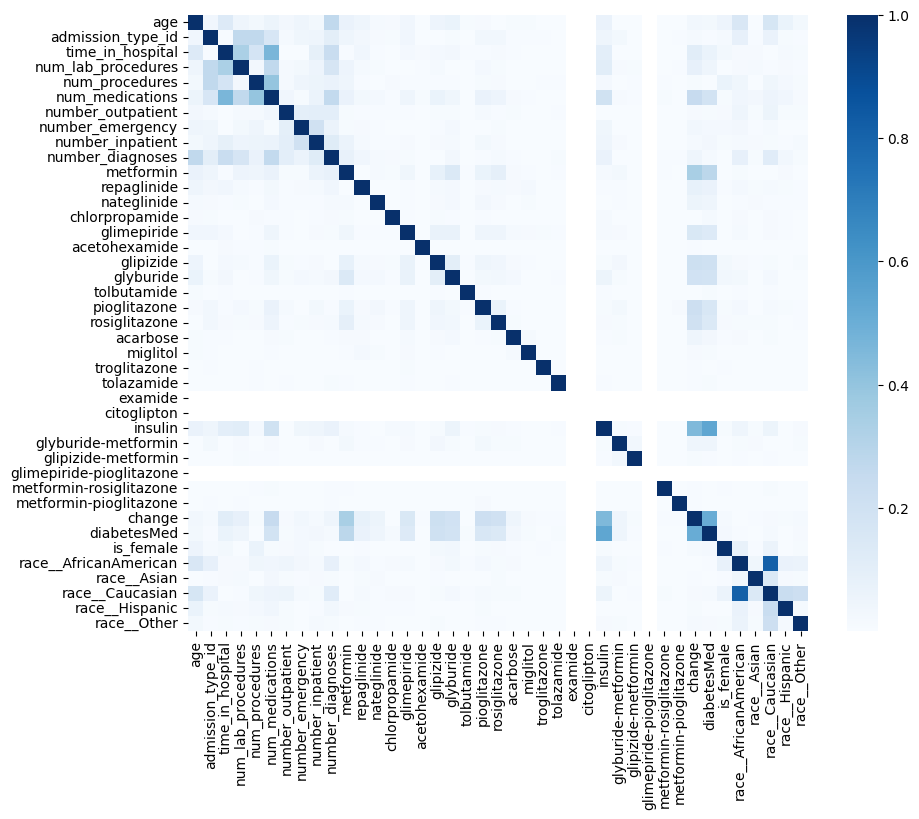

In [102]:
#To check for correlation between variables
corr_mat = df.loc[:, df.columns != 'readmitted'].corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(abs(corr_mat), cmap= 'Blues') 
plt.savefig('correlation_heatmap.png', format='png', dpi=300)
plt.show()

# Class Imbalance

In the dataset, the target values ('No readmission,' 'more than 30 days,' and 'less than 30 days') exhibit an
imbalance, as illustrated in the graph below.

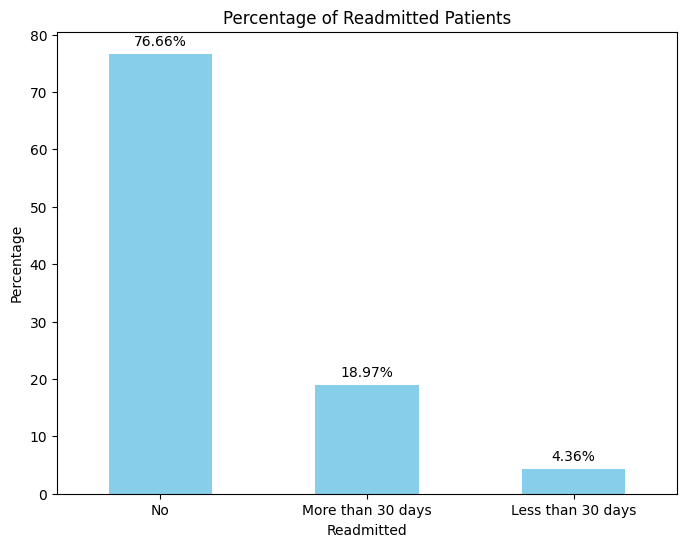

In [103]:
#map the values to more interpretable values
mapping = {0: 'No', 1: 'More than 30 days', 2: 'Less than 30 days'}
df['readmitted_mapped'] = df['readmitted'].map(mapping)
#get the value counts
value_counts = df['readmitted_mapped'].value_counts()
value_percentages = (value_counts / len(df)) * 100
plt.figure(figsize=(8, 6))
ax = value_percentages.plot(kind='bar', color='skyblue')


for i, v in enumerate(value_percentages):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Percentage')
# Keep x-axis labels horizontal
plt.xticks(rotation=0)  
plt.show()

We are addressing this issue through two methods, aiming to assess model performance.


**a. Oversampling the Minority Classes:**
This approach involves creating more instances of the underrepresented classes to achieve class
balance.


**b. Under sampling the Majority Class:**
Here, we reduce the number of instances in the majority class to balance the dataset. These
methods allow us to better evaluate model effectiveness in handling imbalanced data.

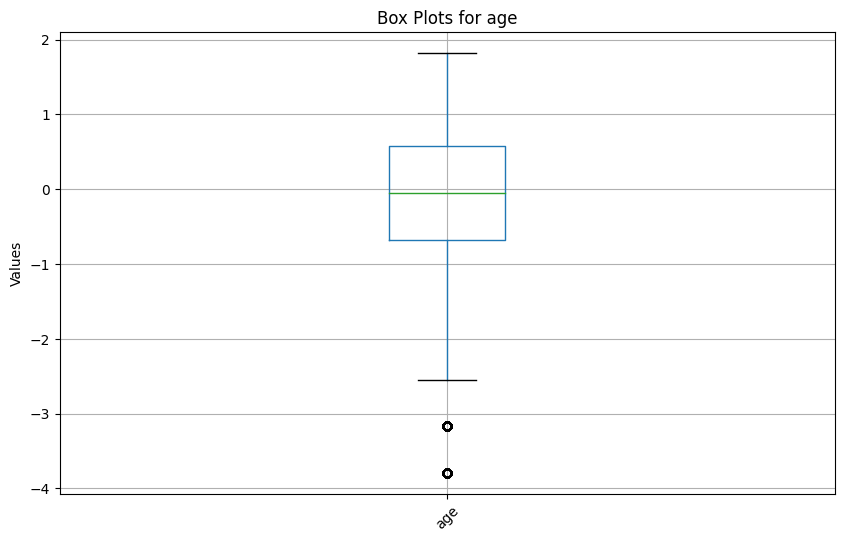

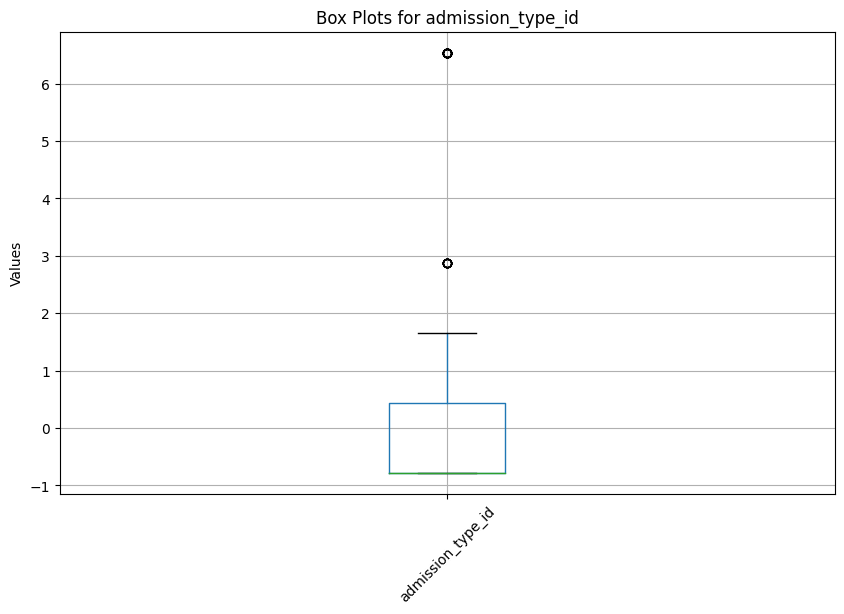

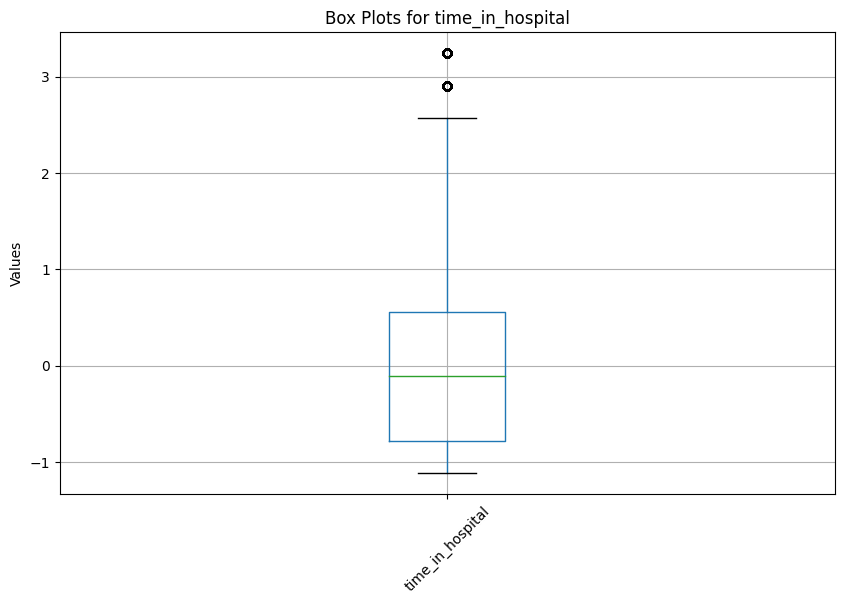

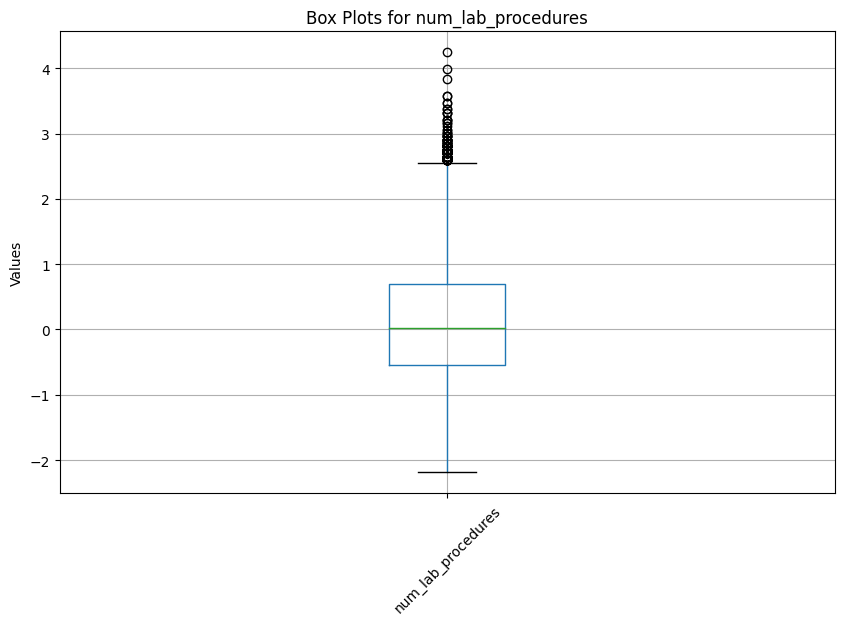

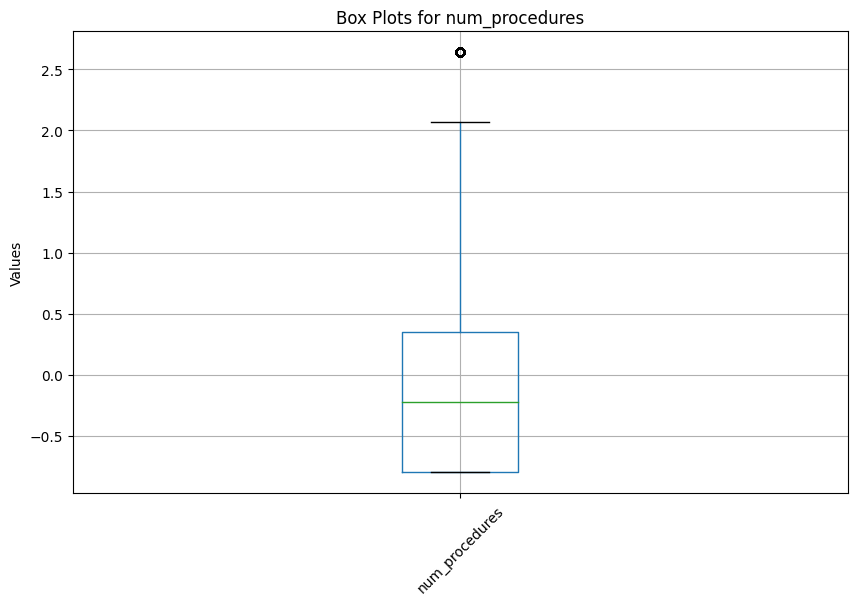

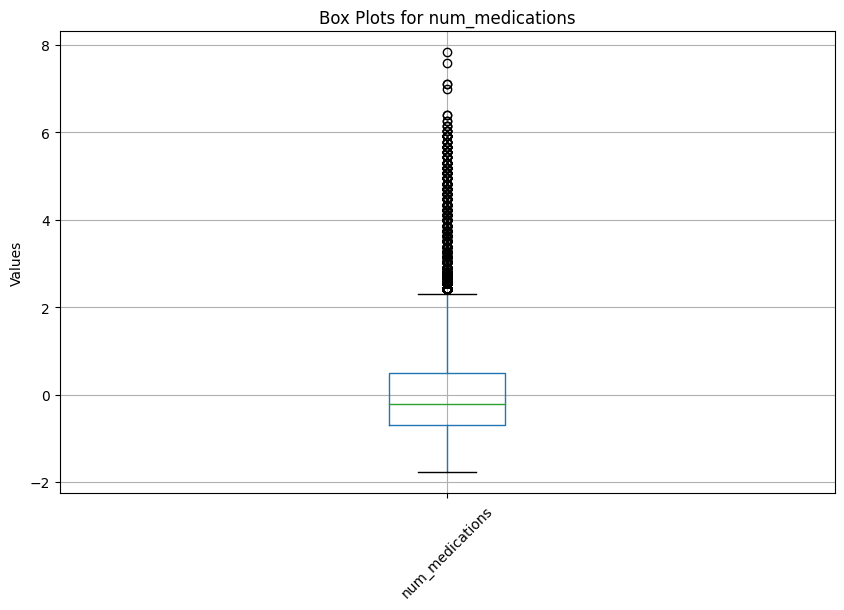

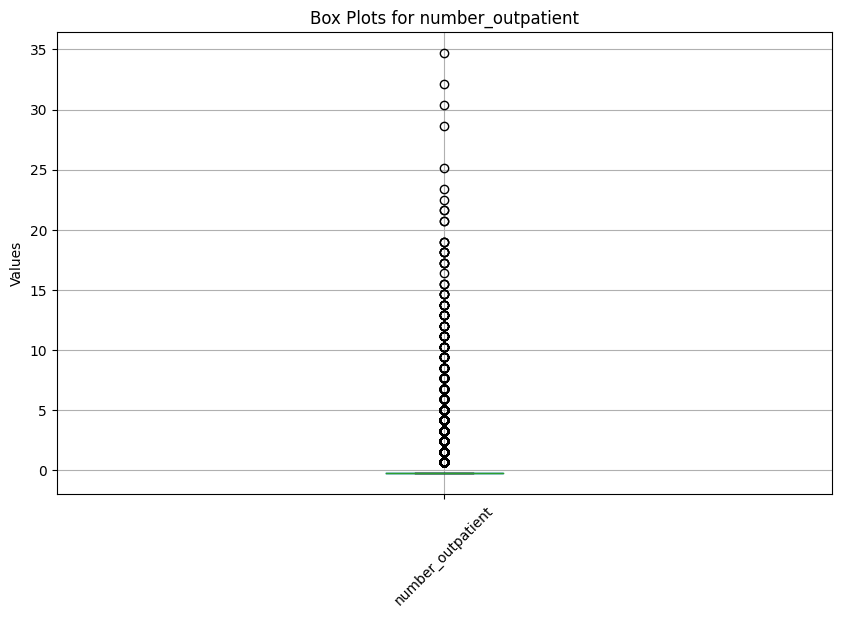

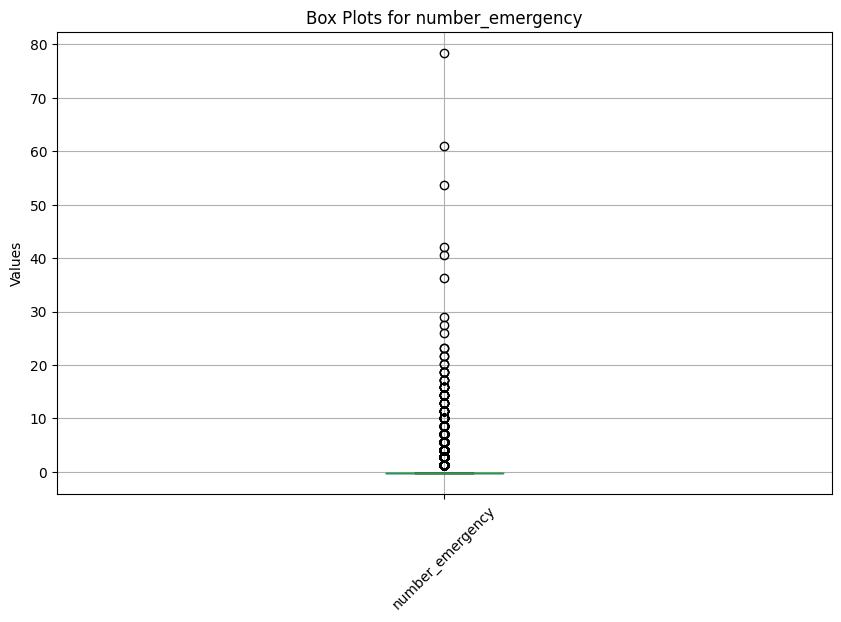

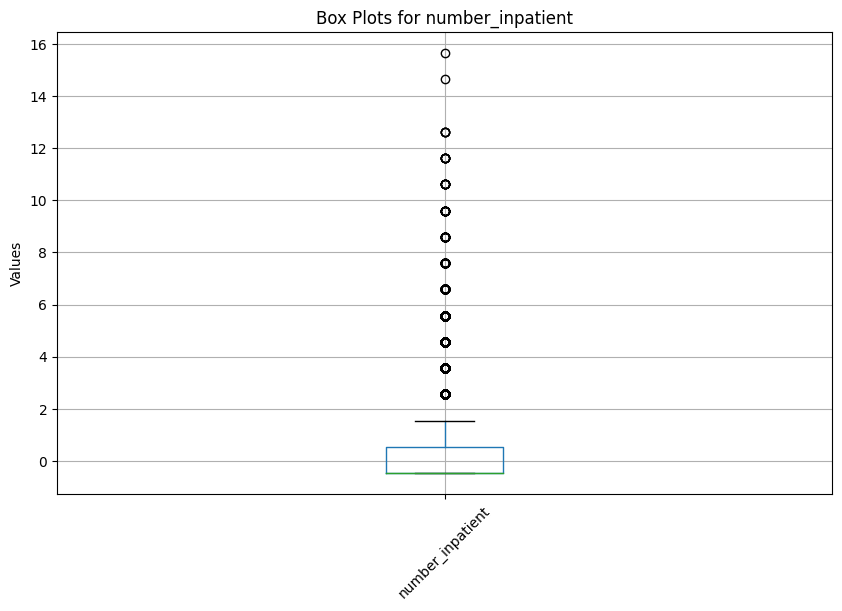

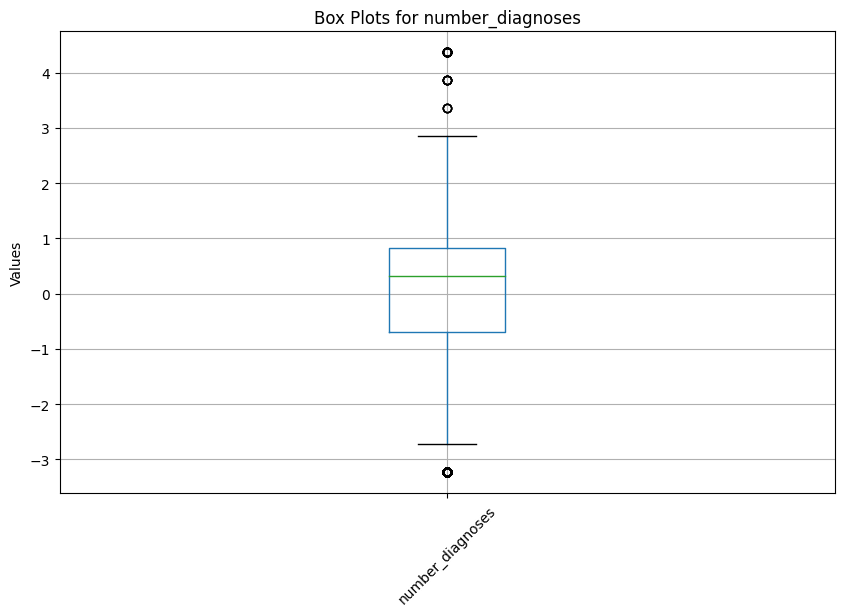

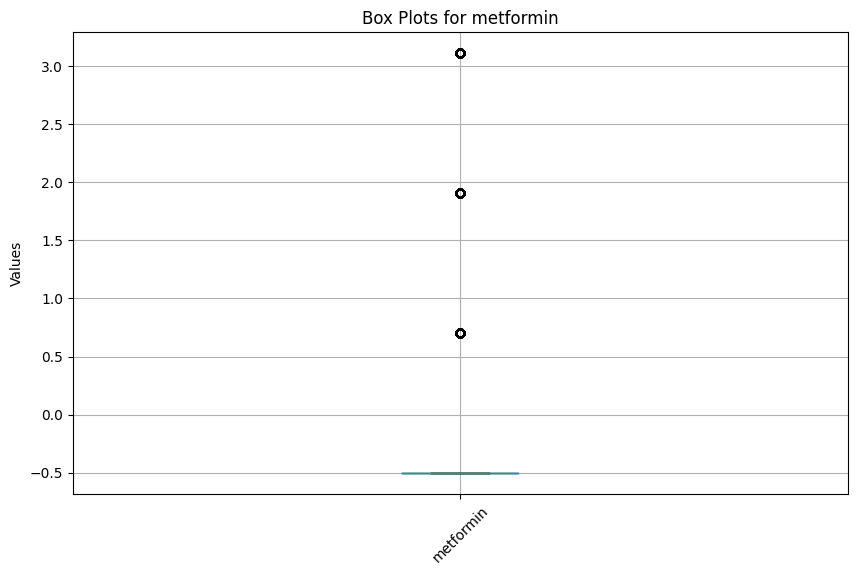

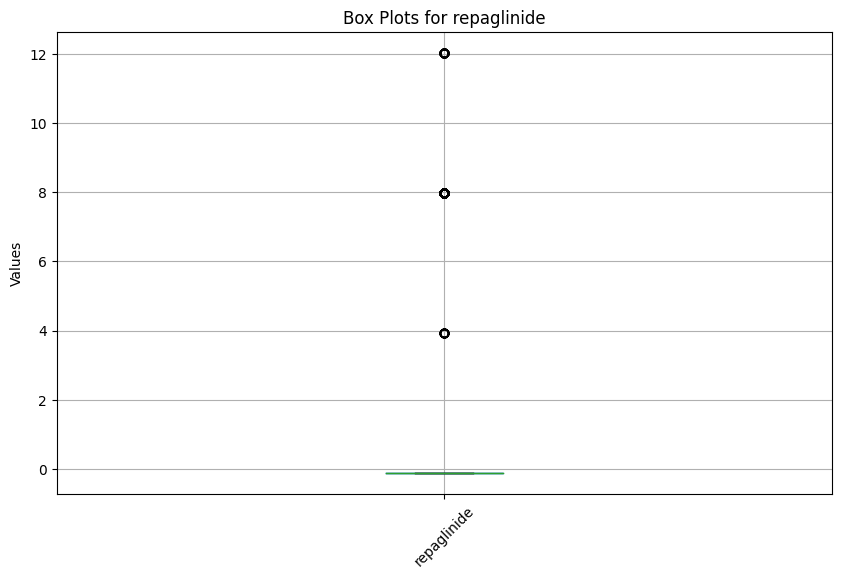

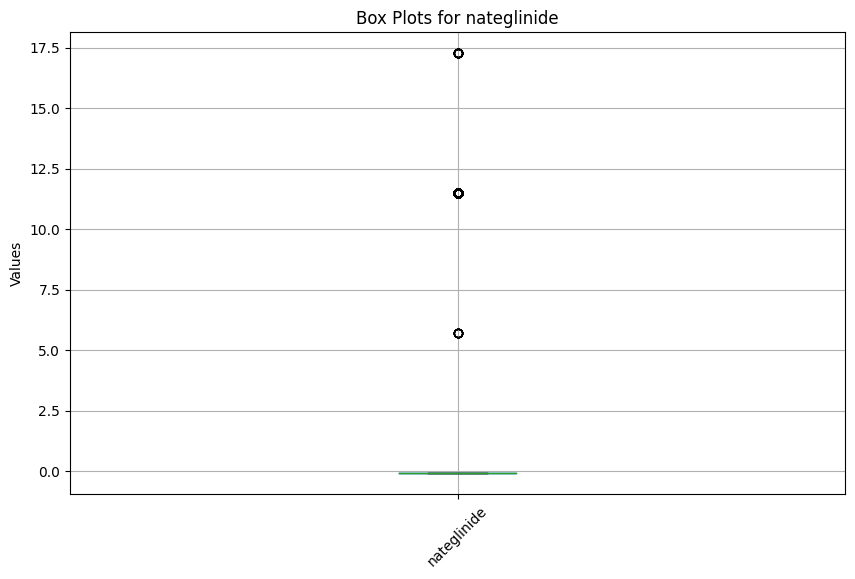

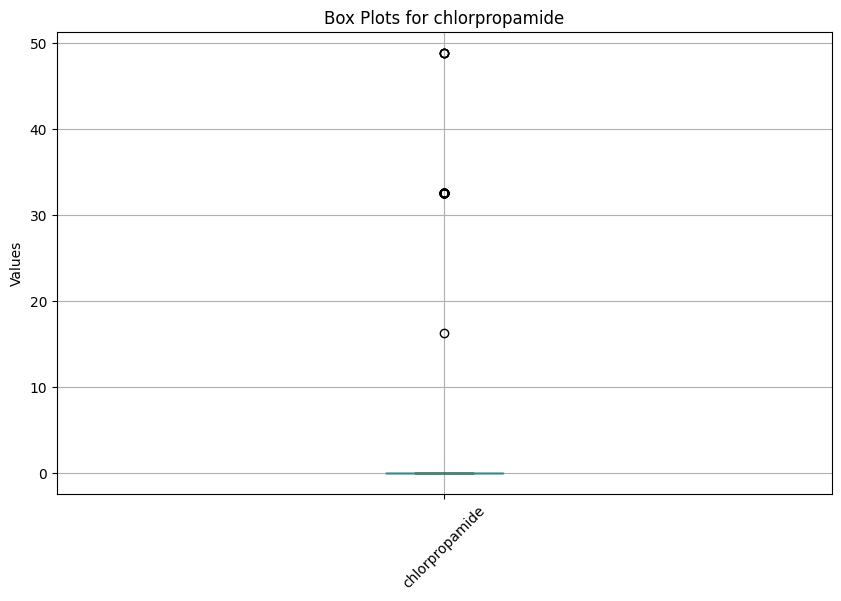

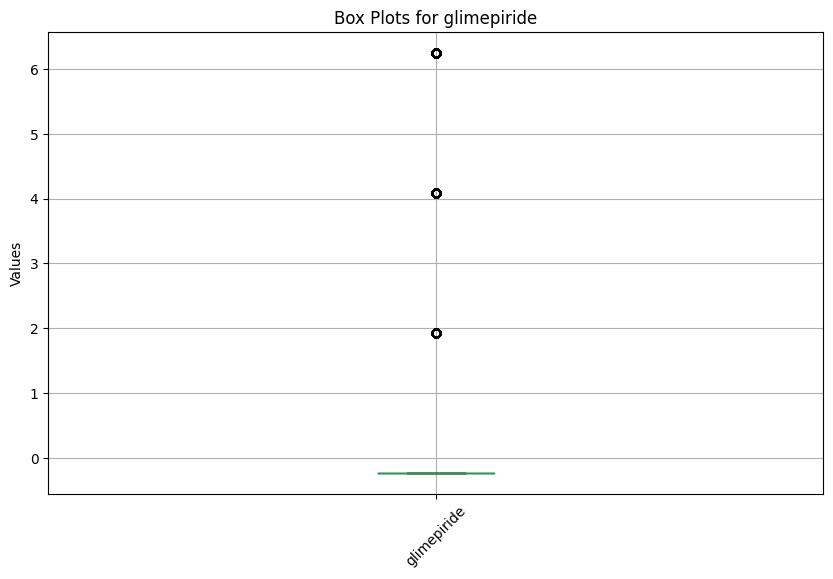

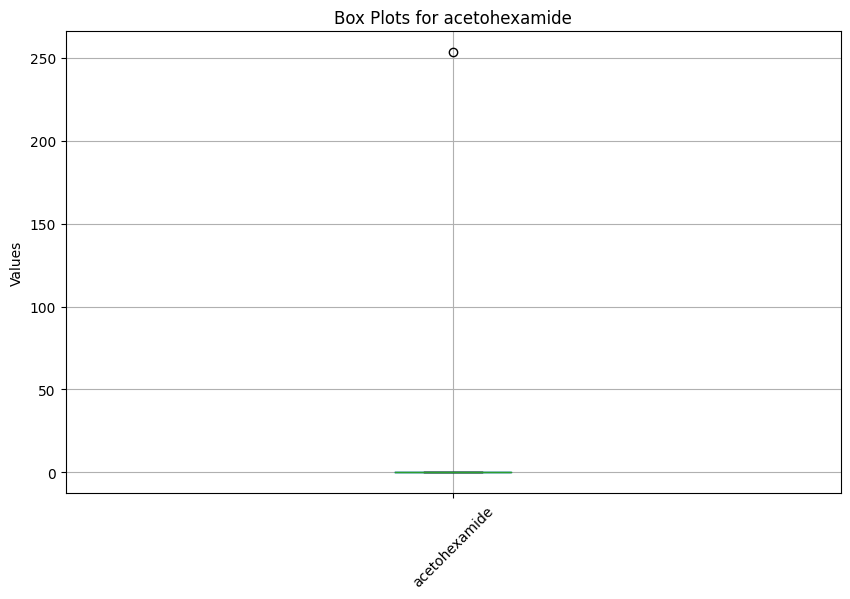

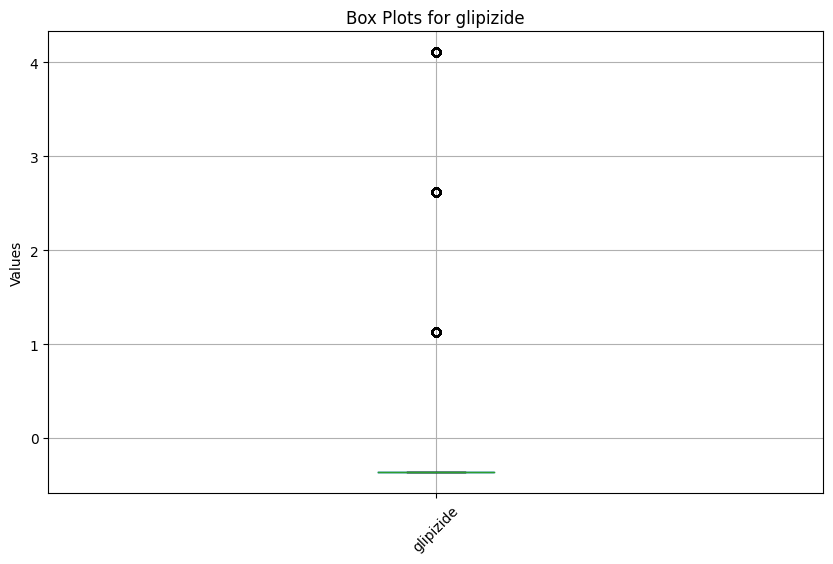

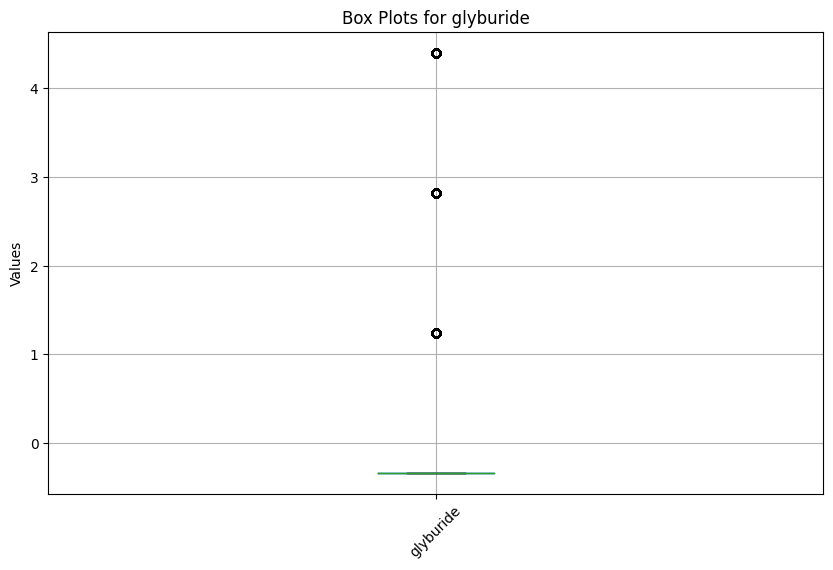

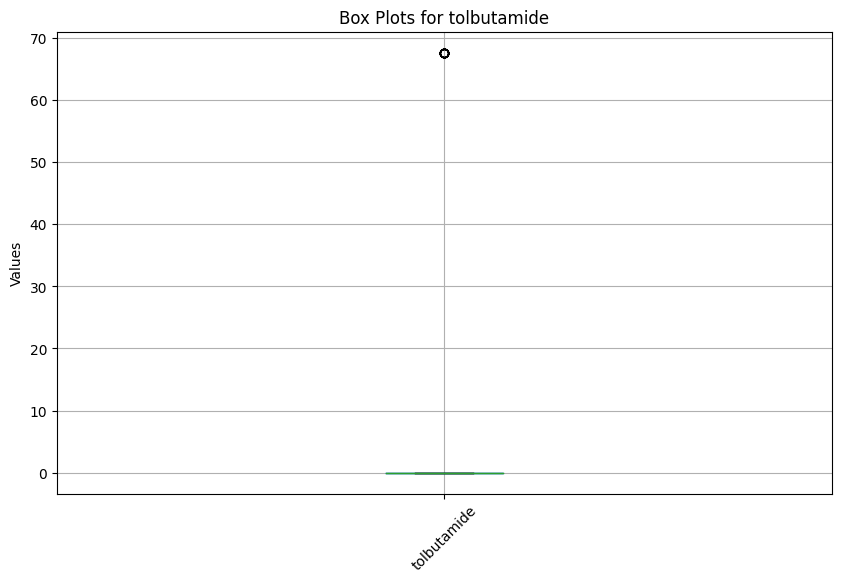

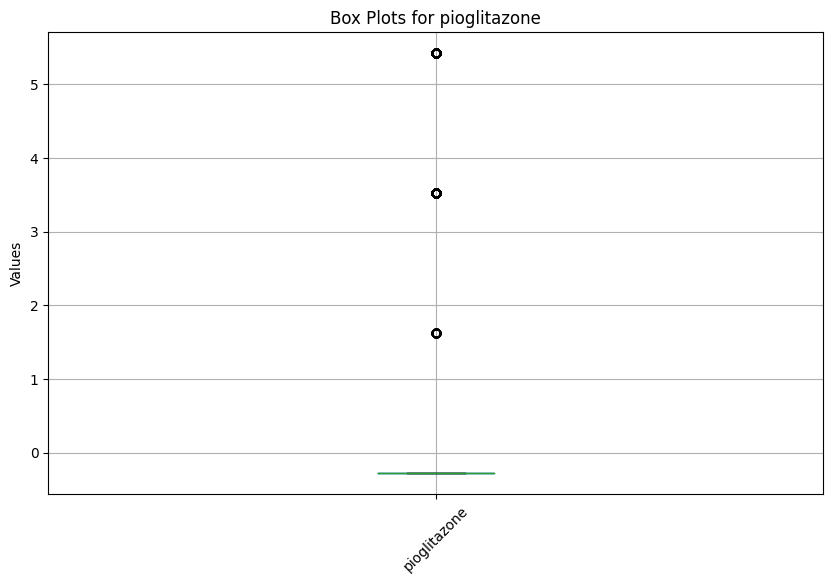

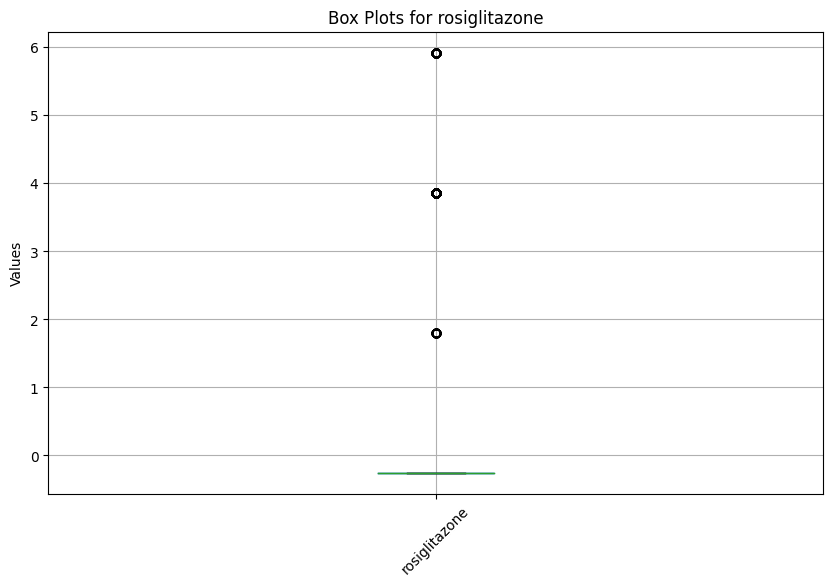

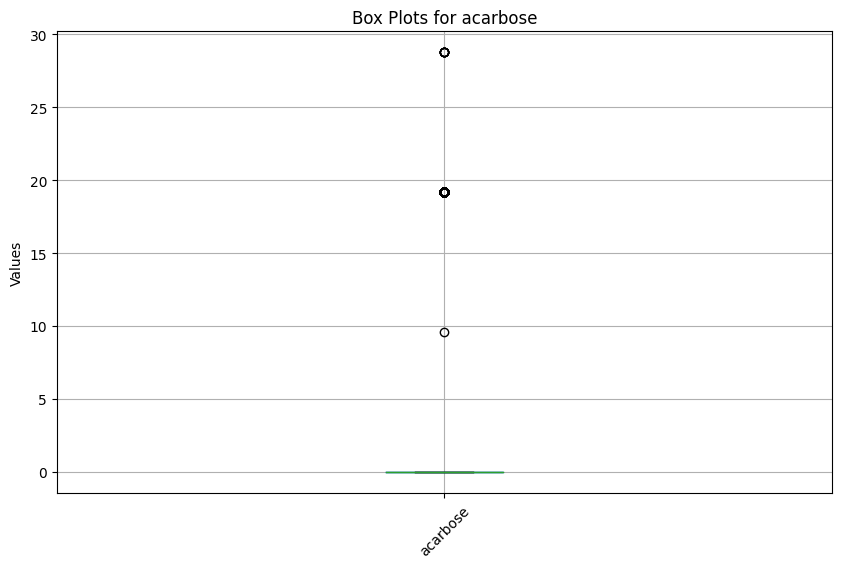

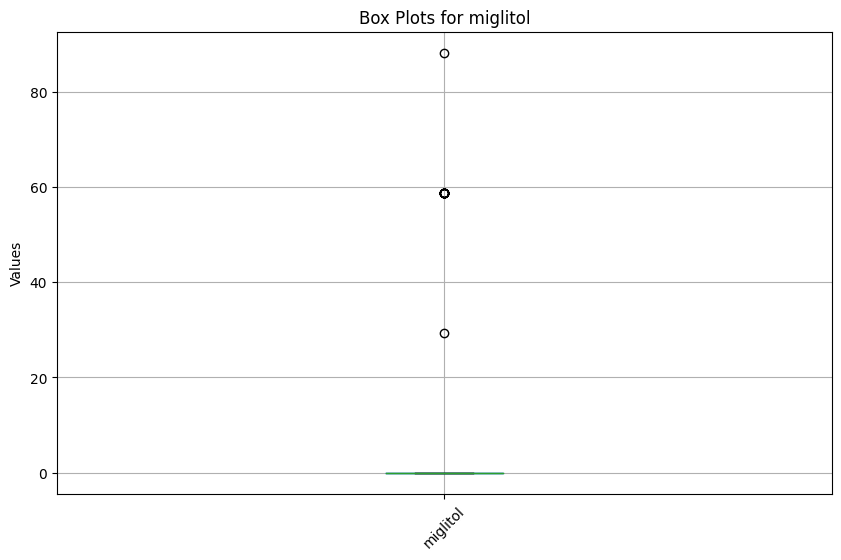

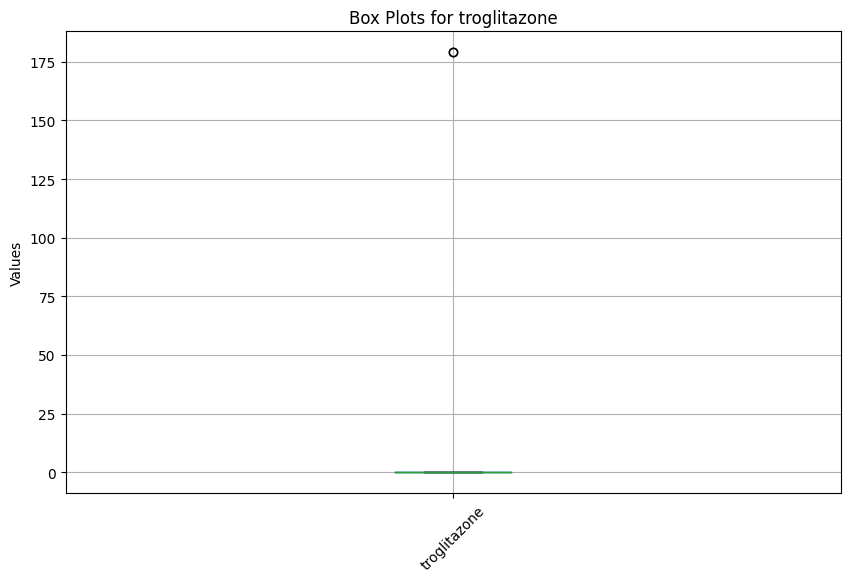

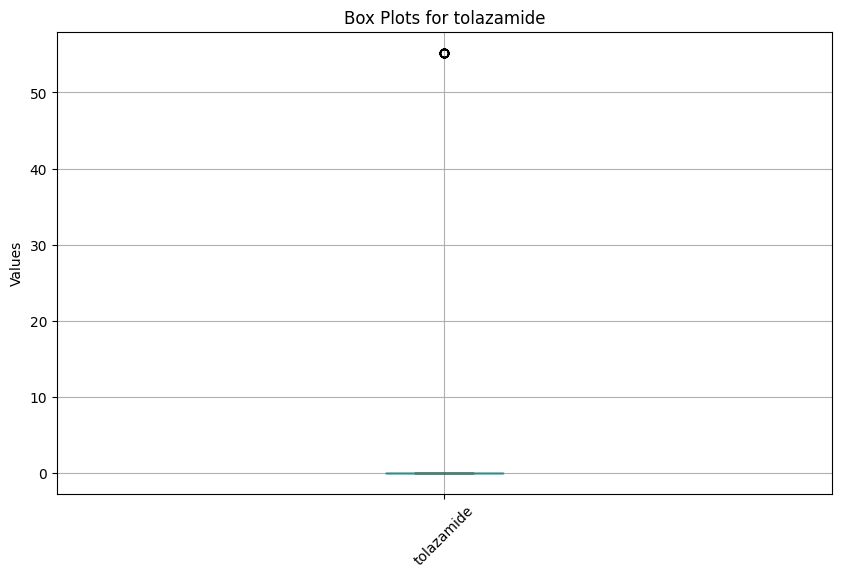

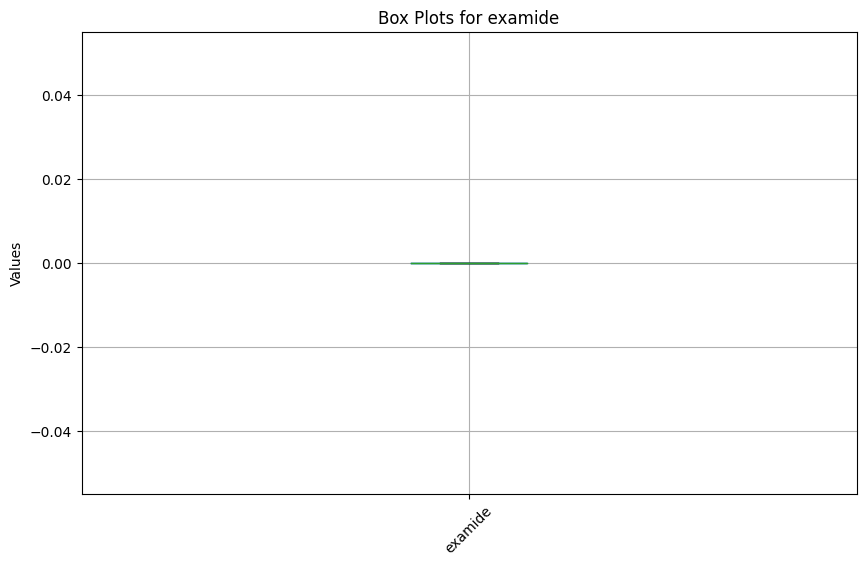

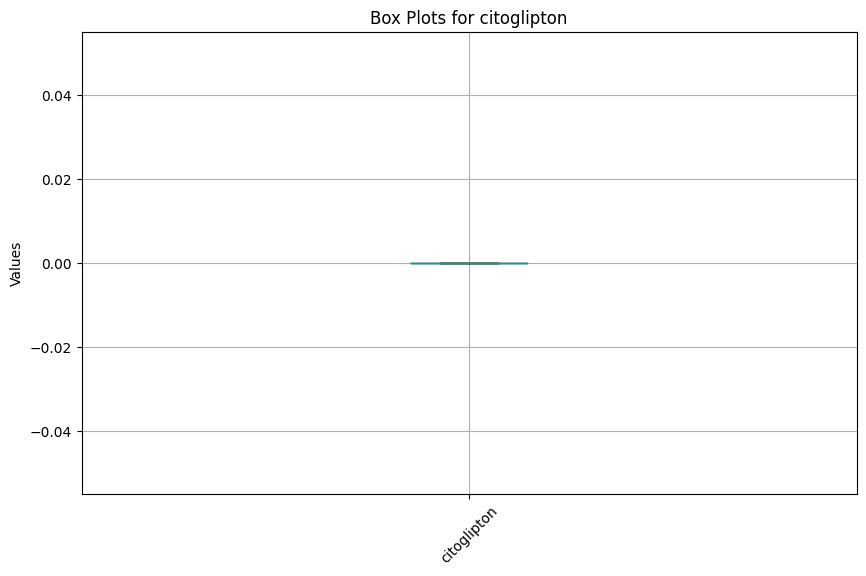

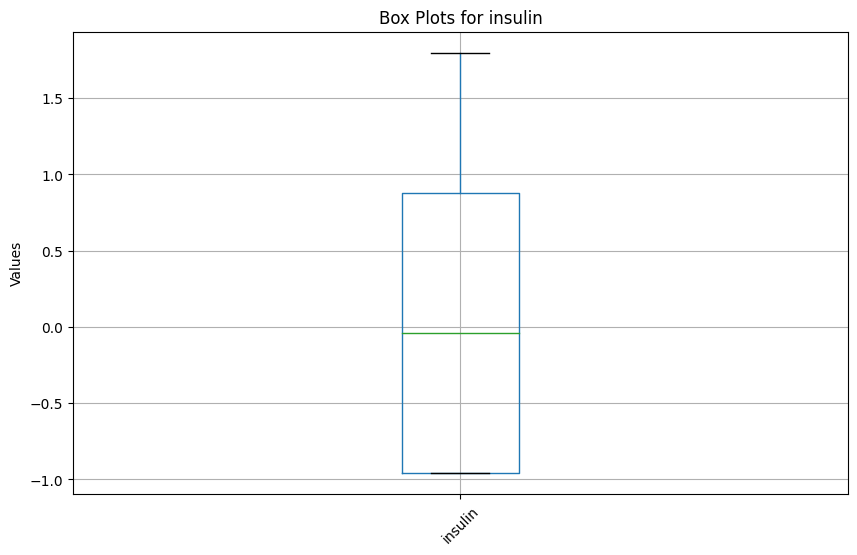

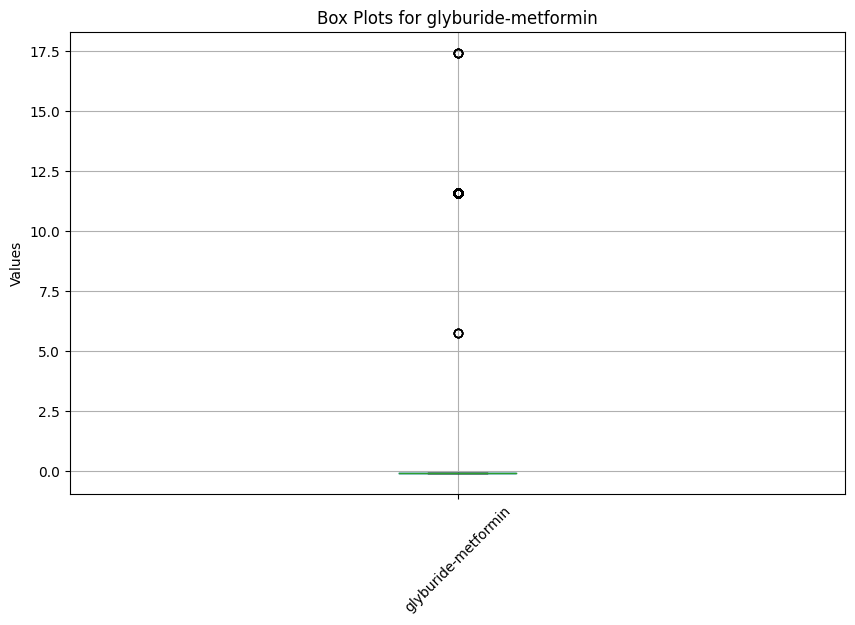

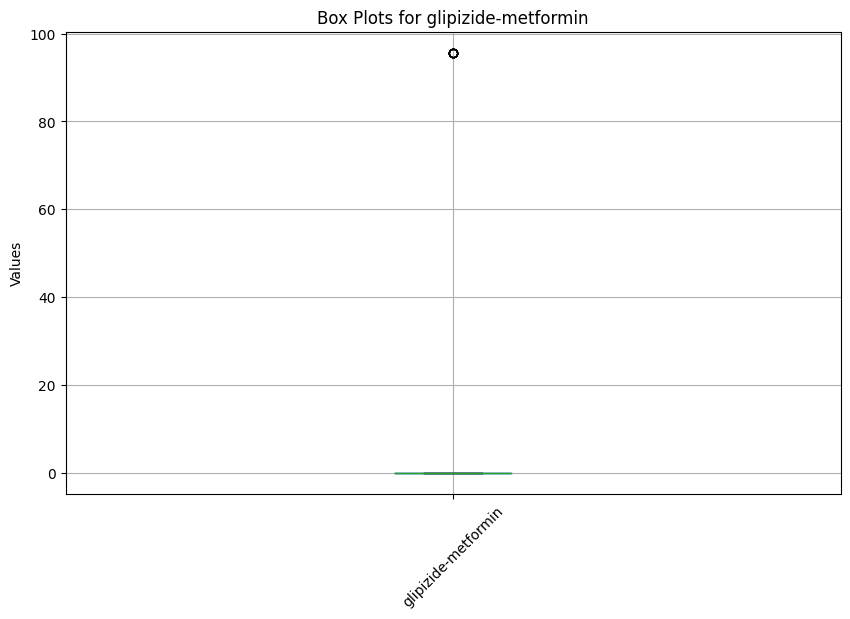

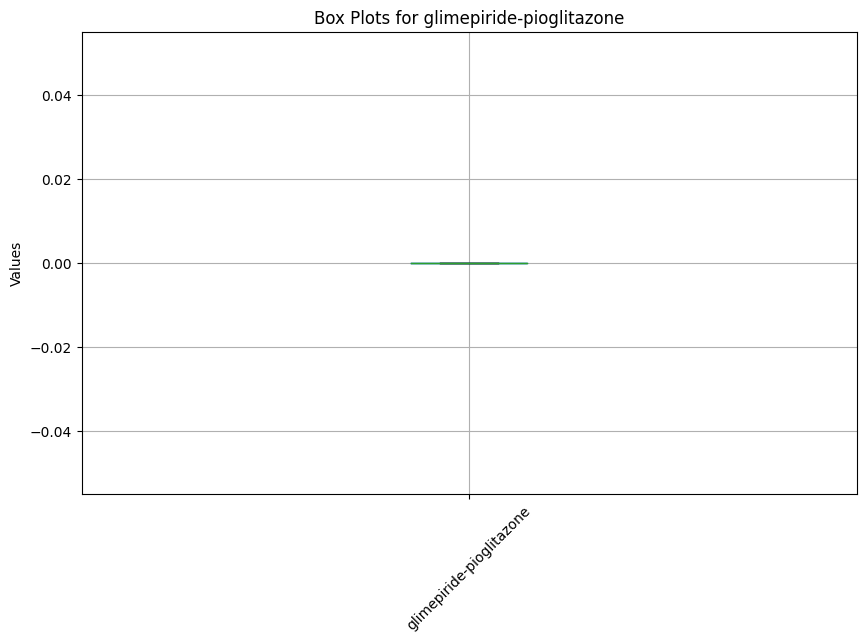

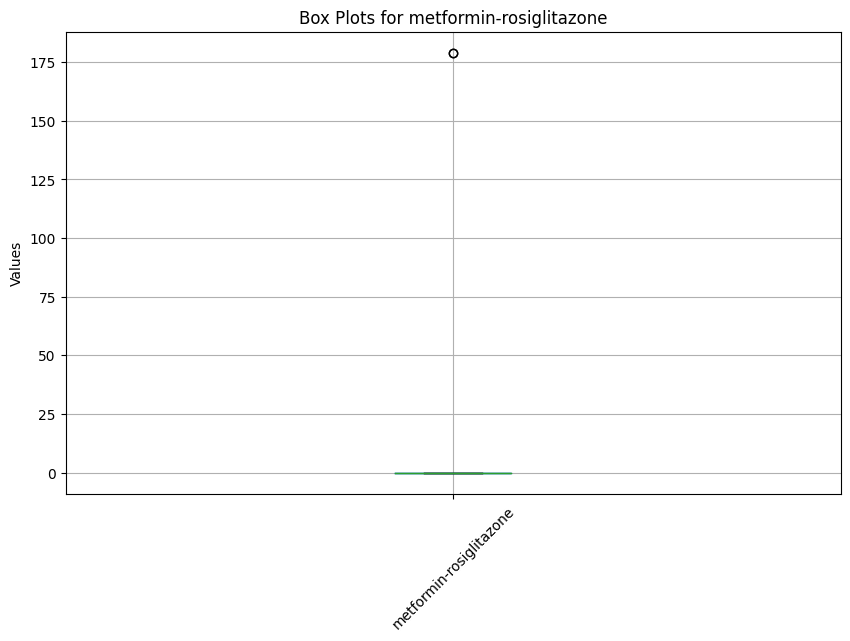

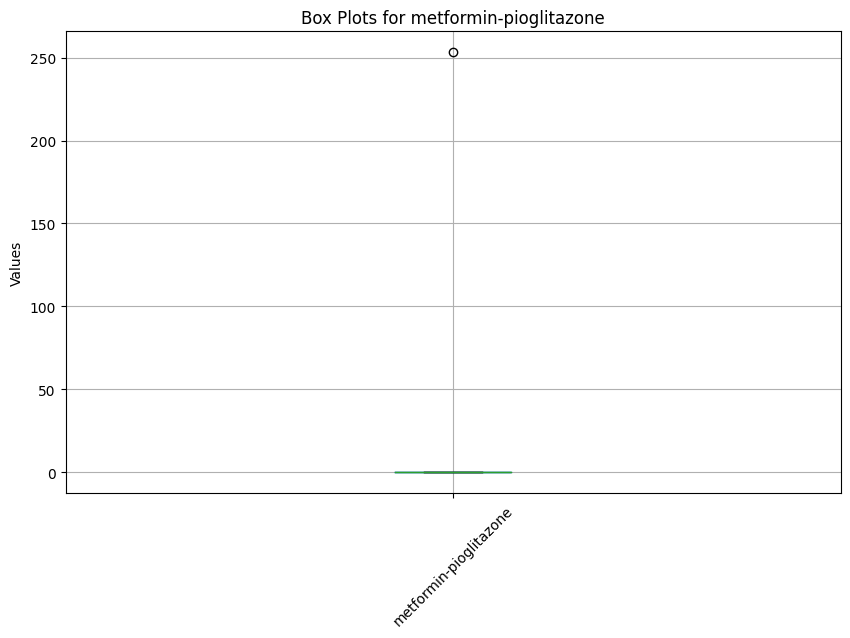

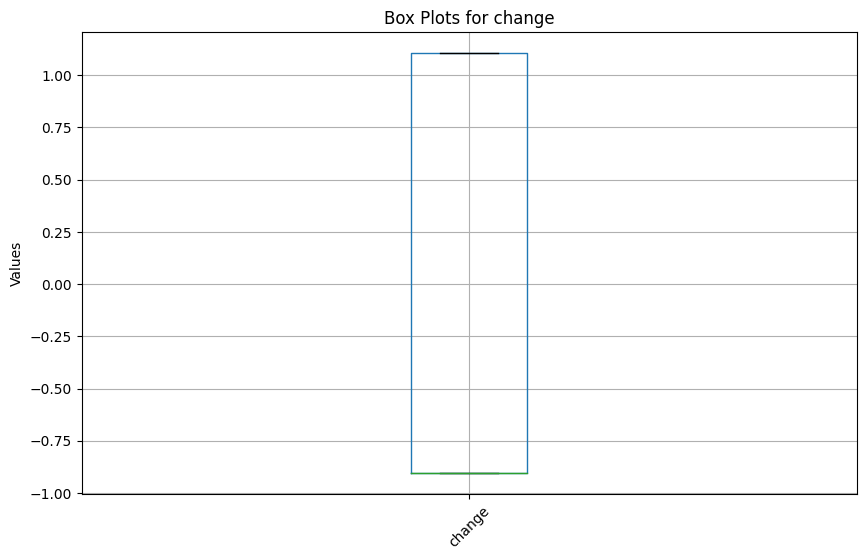

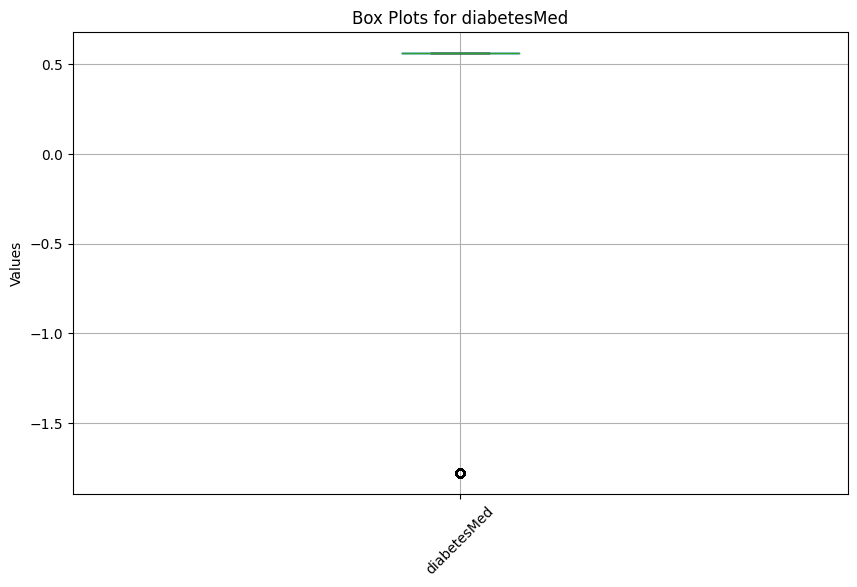

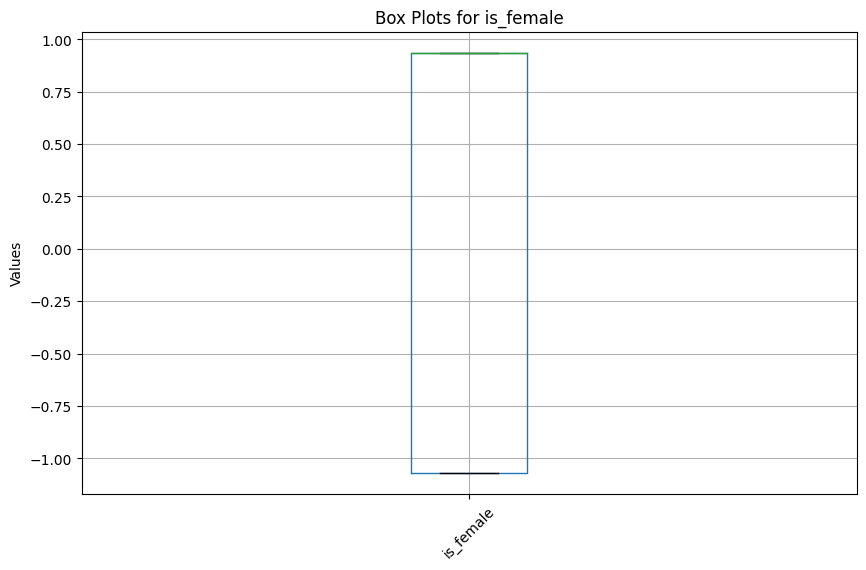

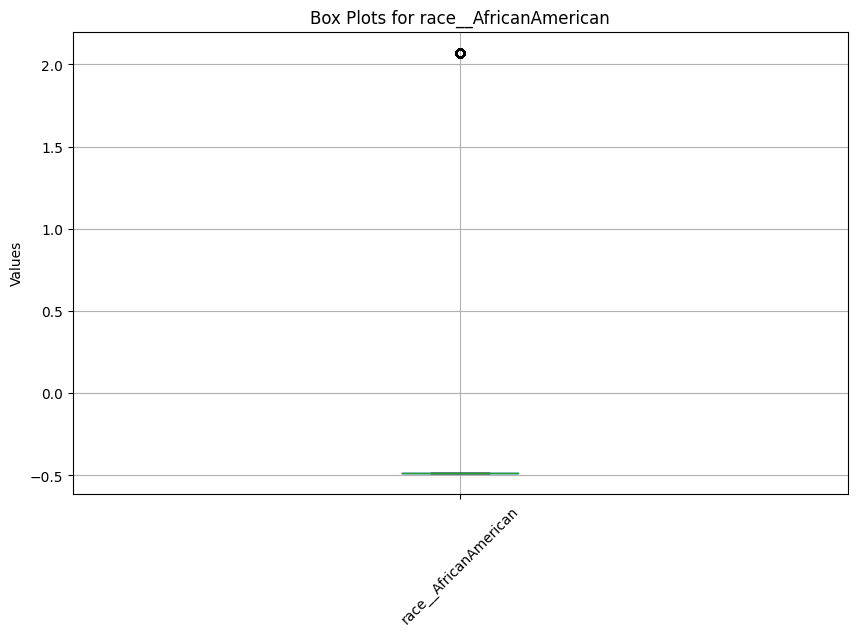

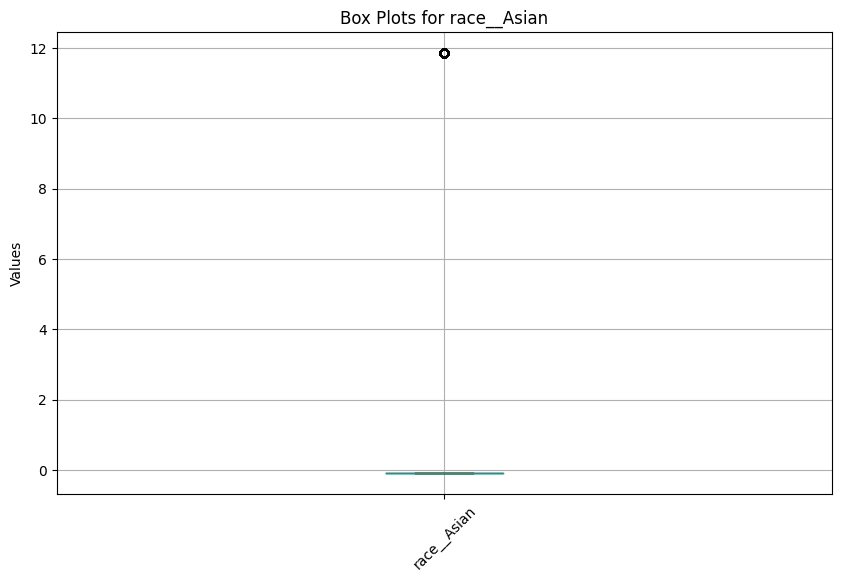

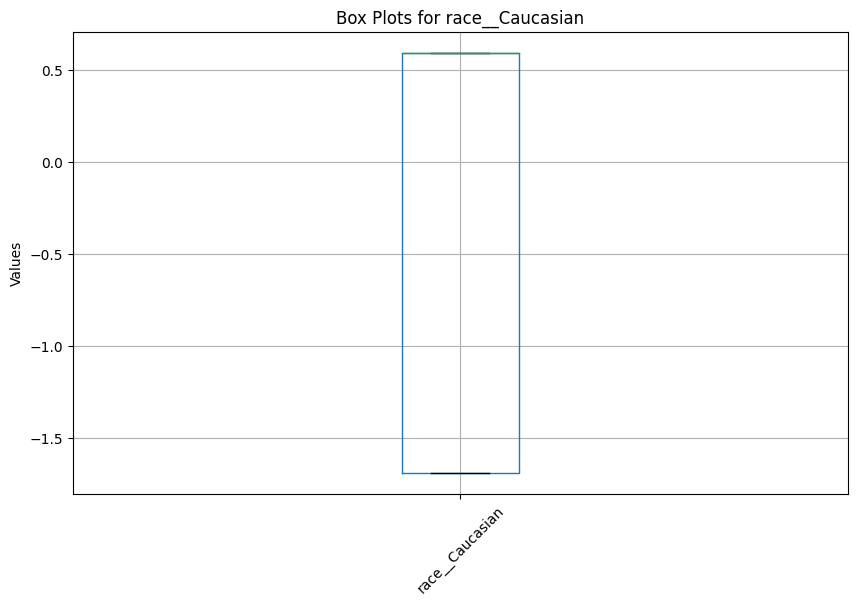

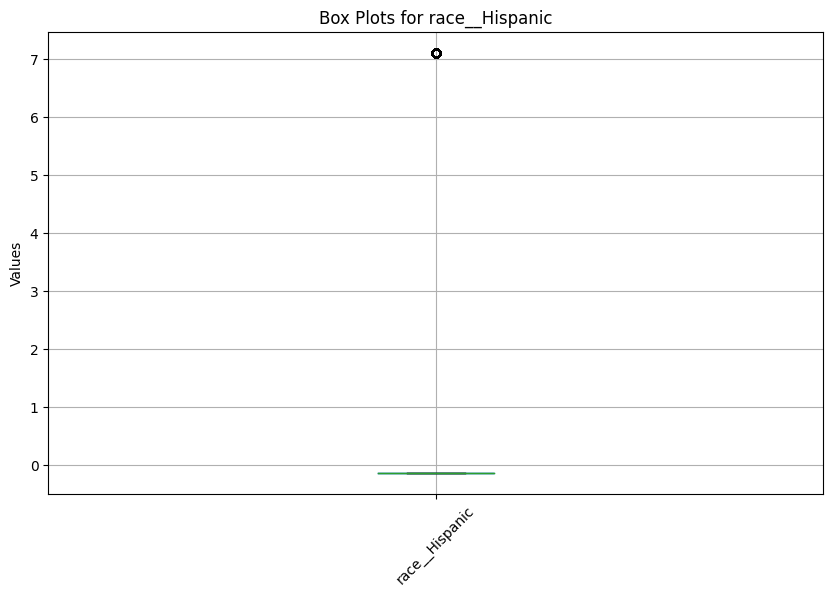

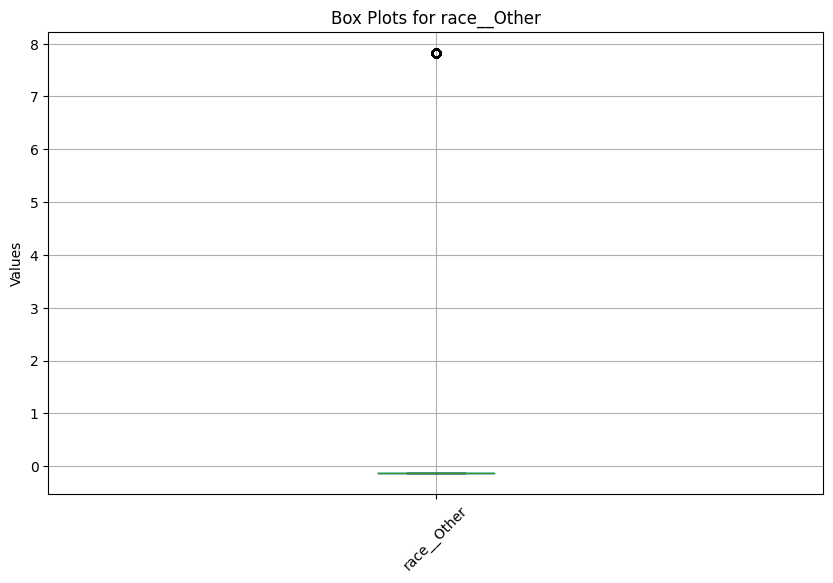

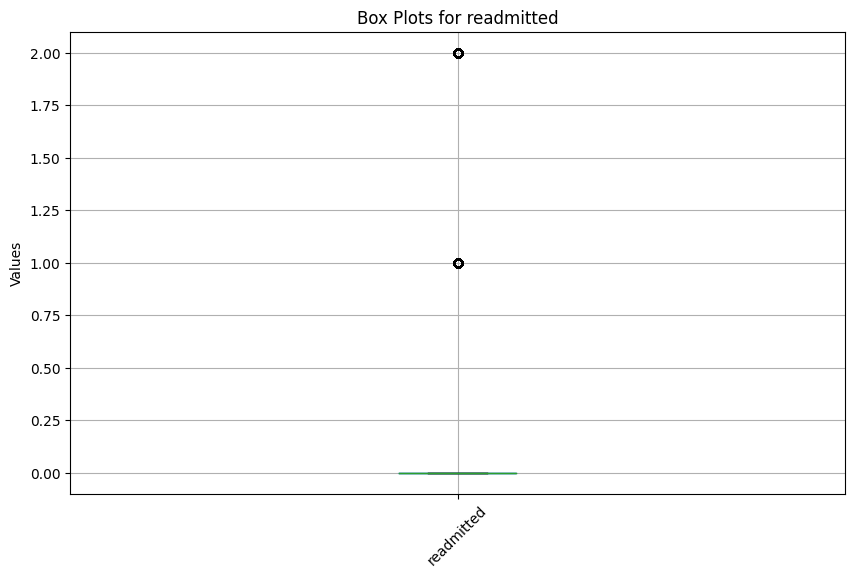

In [104]:
df.drop(['readmitted_mapped'], axis=1, inplace=True)

#To plot the box plots of all the colmuns
for col in df.columns:
    plt.figure(figsize=(10, 6)) 
    df[[col]].boxplot()
    plt.title(f'Box Plots for {col}')
    plt.ylabel('Values')
    plt.xticks(rotation=45) 
    plt.show()


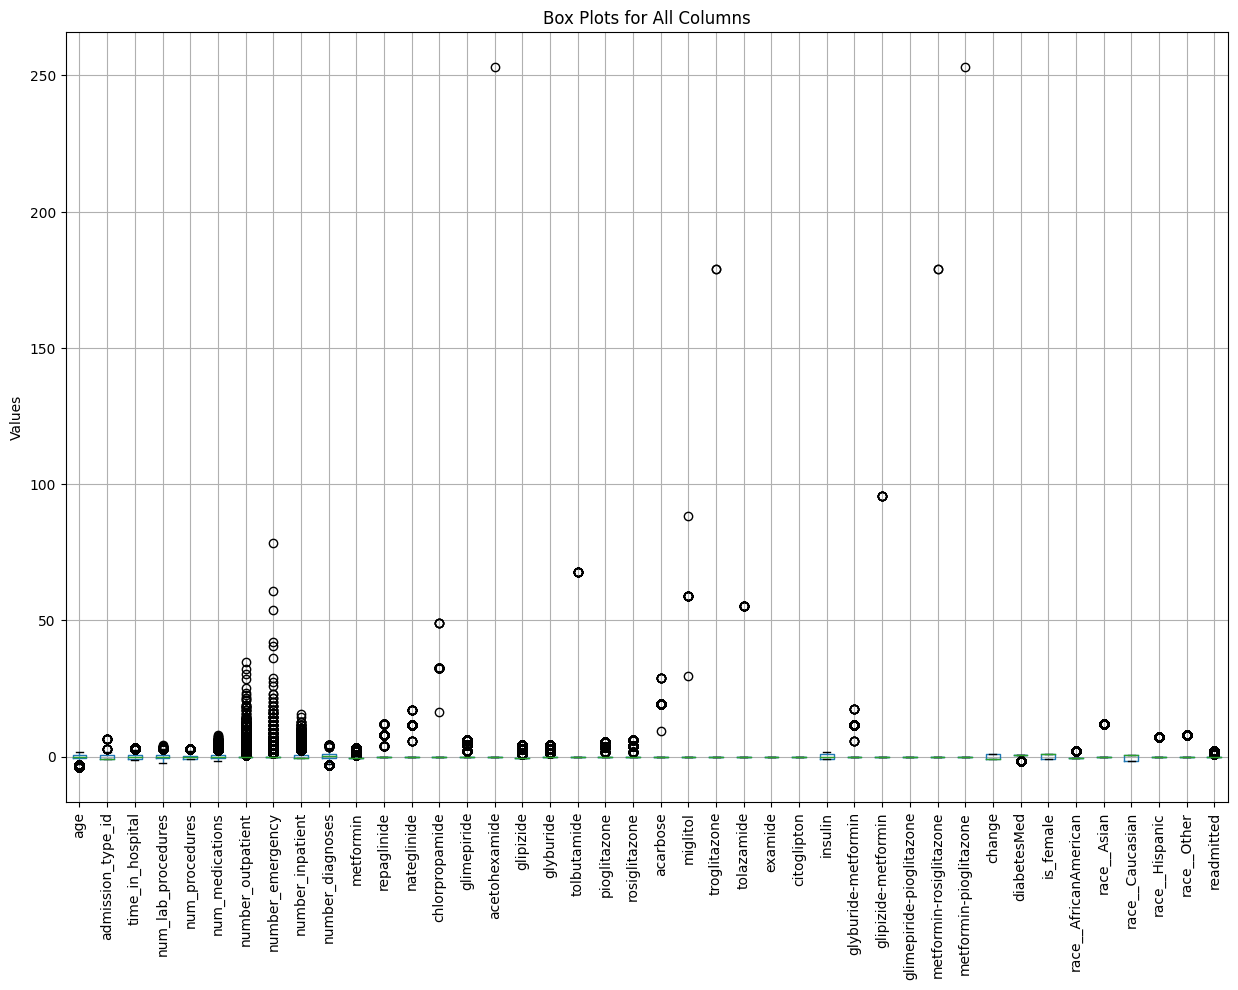

In [105]:
# combine all the columns into one plot
plt.figure(figsize=(15, 10))
box_plot = df.boxplot()
plt.title('Box Plots for All Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.savefig('box_plots.png', format='png', dpi=300)
plt.show()

Lab procedures
num_medications
number_outpatient
number_emergency
number_inpatient

In [106]:
# To check the columns of dataframe
df.columns

Index(['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
       'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
       'race__Hispanic', 'race__Other', 'readmitted'],
      dtype='object')

[Table of contents](#Table-of-Contents)
## Naive Bayes<a id="Naive Bayes"></a>

Naive Bayes was selected for predicting patient readmission because of its simplicity and efficiency in
handling binary classification tasks. The model excels in providing quick and reliable results. Its
probabilistic approach, based on Bayes' theorem, is particularly suitable for medical diagnosis where we
want to estimate the likelihood of readmission. Naive Bayes assumes feature independence, which
simplifies the modelling process while maintaining respectable predictive accuracy. With its
straightforward nature and effectiveness, Naive Bayes proves to be a well-suited choice for our specific
healthcare problem.

## Original Dataset

## Without scaling

In [107]:
#To perfoem Naive bayes onf unscaled data

features = df_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_no_scaling['readmitted']

#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#perform NB classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
#to predict the values
y_pred = clf.predict(X_test)
#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Accuracy: 74.13%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      9813
           1       0.34      0.16      0.22      2446
           2       0.17      0.04      0.06       556

    accuracy                           0.74     12815
   macro avg       0.43      0.38      0.38     12815
weighted avg       0.68      0.74      0.70     12815



## Gaussian Naive bayes with scaling

In [108]:
#To perform naive bayes on scaled data

features = df[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df['readmitted']
#To get the train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#perform the model
clf = GaussianNB()
clf.fit(X_train, y_train)
#To predict the data
y_pred = clf.predict(X_test)
#get the model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 4.39%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.00      0.00      9813
           1       0.15      0.00      0.00      2446
           2       0.04      1.00      0.08       556

    accuracy                           0.04     12815
   macro avg       0.33      0.33      0.03     12815
weighted avg       0.64      0.04      0.00     12815



# Over Sampled Dataset

## Without Scaling

In [109]:
#As we are facing class imbalance issue
#We are performing over sampling in the data to try and tackle this issue

class_0 = df_no_scaling[df_no_scaling['readmitted'] == 0]
class_1 = df_no_scaling[df_no_scaling['readmitted'] == 1]
class_2 = df_no_scaling[df_no_scaling['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

#Setting the random state to 42 and performing sampling
class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

df_over_no_scaling = copy.deepcopy(df_oversampled)

In [110]:
#Performing the same on the above dataset
features = df_over_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_over_no_scaling['readmitted']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Accuracy: 42.43%
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.70      0.52      9747
           1       0.44      0.21      0.28      9794
           2       0.44      0.37      0.40      9931

    accuracy                           0.42     29472
   macro avg       0.43      0.42      0.40     29472
weighted avg       0.43      0.42      0.40     29472



## Fine Tuning

In [111]:
#Performing grid search to fine tune the model
features = df_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_no_scaling['readmitted']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB


param_grid = {
    'alpha': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0] 
}


clf = MultinomialNB()


grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1) 


grid_search.fit(X_train, y_train)


best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


/Users/lawshia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/lawshia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/lawshia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/lawshia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warn

Best Hyperparameters: {'alpha': 0.1}
Accuracy: 74.14%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      9813
           1       0.35      0.16      0.22      2446
           2       0.16      0.04      0.06       556

    accuracy                           0.74     12815
   macro avg       0.43      0.38      0.38     12815
weighted avg       0.68      0.74      0.70     12815



## with Scaling

In [112]:
#Apply scaling on the oversampled data and then perform the NB classifier on it
scalar = StandardScaler().fit(df_oversampled.iloc[:,:-1])
df_oversampled.iloc[:,:-1] = scalar.transform(df_oversampled.iloc[:,:-1])
df_oversampled.head()


,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
17936,-1.421386,1.734819,-0.833873,0.095294,-0.207180,-0.044259,-0.299271,0.855521,1.737790,-0.906409,...,-0.003684,-0.936435,0.51843,-1.061482,-0.440927,-0.082367,0.541730,-0.133939,-0.124212,0
991,0.515822,-0.754825,-1.164346,-0.785456,-0.788604,-1.404871,-0.299271,-0.222181,0.222936,-0.361394,...,-0.003684,-0.936435,-1.92890,-1.061482,-0.440927,-0.082367,0.541730,-0.133939,-0.124212,0
48612,1.161558,1.734819,0.157547,-2.287913,-0.788604,-1.528563,-0.299271,-0.222181,-0.534491,-0.906409,...,-0.003684,-0.936435,0.51843,0.942079,-0.440927,-0.082367,0.541730,-0.133939,-0.124212,0
58061,-1.421386,-0.754825,-1.164346,-0.526412,-0.788604,-1.528563,-0.299271,-0.222181,-0.534491,0.728636,...,-0.003684,-0.936435,0.51843,0.942079,2.267947,-0.082367,-1.845939,-0.133939,-0.124212,0
12897,0.515822,-0.754825,-0.833873,0.406147,-0.207180,-0.291643,-0.299271,-0.222181,-0.534491,0.728636,...,-0.003684,-0.936435,-1.92890,0.942079,-0.440927,-0.082367,0.541730,-0.133939,-0.124212,0


In [113]:
#Applying NB on the above dataset

features = df_oversampled[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_oversampled['readmitted']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


clf = GaussianNB()
clf.fit(X_train, y_train)

#to predict
y_pred = clf.predict(X_test)

#model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 33.80%
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.00      0.00      9747
           1       0.63      0.00      0.01      9794
           2       0.34      1.00      0.50      9931

    accuracy                           0.34     29472
   macro avg       0.57      0.33      0.17     29472
weighted avg       0.57      0.34      0.17     29472



# Under Sampled Dataset

## Without Scaling

In [114]:
#As we are facing class imbalance issue
#We are performing under sampling in the data to try and tackle this issue


class_0 = df_no_scaling[df_no_scaling['readmitted'] == 0]
class_1 = df_no_scaling[df_no_scaling['readmitted'] == 1]
class_2 = df_no_scaling[df_no_scaling['readmitted'] == 2]

 
min_class = min(len(class_0), len(class_1), len(class_2))

 
class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

 
df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

 
df_under_no_scaling = copy.deepcopy(df_undersampled)

In [115]:
#To perform model on the above data
 
features = df_under_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_under_no_scaling['readmitted']
#train and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

 
clf = MultinomialNB()
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

#model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Accuracy: 41.84%
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.66      0.51       562
           1       0.43      0.20      0.28       542
           2       0.42      0.38      0.40       574

    accuracy                           0.42      1678
   macro avg       0.42      0.42      0.40      1678
weighted avg       0.42      0.42      0.40      1678



## With Scaling

In [116]:
#Performing scaling on the above data
scalar = StandardScaler().fit(df_undersampled.iloc[:,:-1])
df_undersampled.iloc[:,:-1] = scalar.transform(df_undersampled.iloc[:,:-1])
df_undersampled.head()


,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
41016,1.156596,-0.758224,-1.158071,-1.750071,-0.789454,-0.407582,-0.28807,-0.247702,-0.529318,0.726478,...,0,1.077119,0.521784,0.938915,-0.438548,-0.078213,0.543180,-0.135851,-0.126931,0
41160,-0.122108,-0.758224,1.169249,0.565103,0.367318,0.700737,-0.28807,-0.247702,0.221429,0.726478,...,0,1.077119,0.521784,0.938915,-0.438548,-0.078213,0.543180,-0.135851,-0.126931,0
42875,-1.400812,0.483475,-1.158071,-0.309518,-0.789454,-1.146461,-0.28807,-0.247702,-0.529318,-0.898075,...,0,-0.928402,-1.916502,0.938915,-0.438548,-0.078213,-1.841012,-0.135851,7.878304,0
51027,1.156596,0.483475,3.164094,-0.412415,0.945704,-0.407582,-0.28807,-0.247702,0.221429,0.726478,...,0,1.077119,0.521784,-1.065059,-0.438548,-0.078213,0.543180,-0.135851,-0.126931,0
61486,1.156596,-0.758224,0.171826,1.336828,-0.789454,-1.023314,-0.28807,-0.247702,-0.529318,0.726478,...,0,-0.928402,-1.916502,-1.065059,-0.438548,-0.078213,0.543180,-0.135851,-0.126931,0


In [117]:
#To perform NB classifier on the above data
 
features = df_undersampled[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_undersampled['readmitted']

#Train and test split 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


clf = GaussianNB()
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

#model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 33.31%
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.04      0.07       562
           1       0.33      0.96      0.49       542
           2       0.48      0.02      0.04       574

    accuracy                           0.33      1678
   macro avg       0.41      0.34      0.20      1678
weighted avg       0.41      0.33      0.20      1678



# Final Model

Accuracy: 74.13%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      9813
           1       0.34      0.16      0.22      2446
           2       0.17      0.04      0.06       556

    accuracy                           0.74     12815
   macro avg       0.43      0.38      0.38     12815
weighted avg       0.68      0.74      0.70     12815

Confusion Matrix:
 [[9082  663   68]
 [2007  396   43]
 [ 442   92   22]]


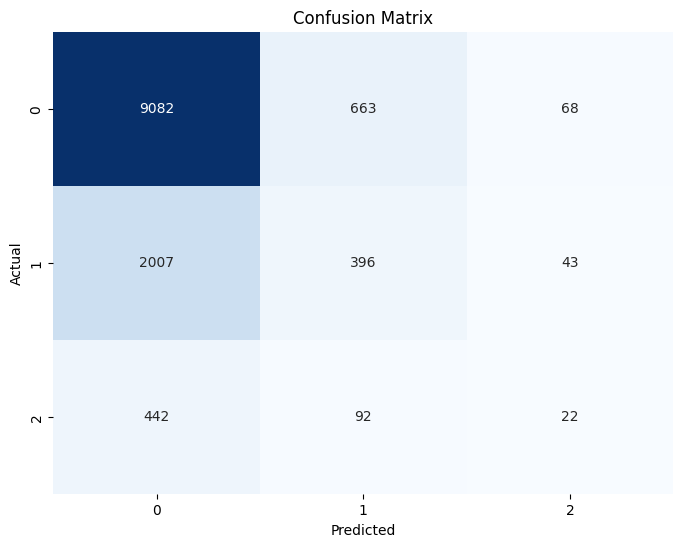

In [118]:
#The final model is chosen based on the model metrics
features = df_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_no_scaling['readmitted']

#Train and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


clf = MultinomialNB()
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

#To get the model metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix_NB.png") 
plt.show()

In [119]:
#Additional model metrics

total_true_positive = 0
total_false_positive = 0
total_false_negative = 0
total_true_negative = 0

# Calculate sensitivity and specificity for each class
sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

    # Aggregate values for micro-average
    total_true_positive += true_positive
    total_false_positive += false_positive
    total_false_negative += false_negative
    total_true_negative += true_negative

# Calculate macro-average sensitivity and specificity
macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Calculate micro-average sensitivity and specificity
micro_average_sensitivity = total_true_positive / (total_true_positive + total_false_negative)
micro_average_specificity = total_true_negative / (total_true_negative + total_false_positive)

# Print the results
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Micro-Average Sensitivity: {:.2f}".format(micro_average_sensitivity))
print("Micro-Average Specificity: {:.2f}".format(micro_average_specificity))



Macro-Average Sensitivity: 0.38
Macro-Average Specificity: 0.70
Micro-Average Sensitivity: 0.74
Micro-Average Specificity: 0.87


# Hyper tuning

Alpha values: [0.1 0.5 1.0 2.0]
Corresponding Accuracy scores: [0.74451768 0.74451768 0.74447866 0.74449817]
Best Hyperparameters: {'alpha': 0.1}
Accuracy: 74.14%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      9813
           1       0.35      0.16      0.22      2446
           2       0.16      0.04      0.06       556

    accuracy                           0.74     12815
   macro avg       0.43      0.38      0.38     12815
weighted avg       0.68      0.74      0.70     12815

Confusion Matrix:
 [[9082  661   70]
 [2006  397   43]
 [ 442   92   22]]


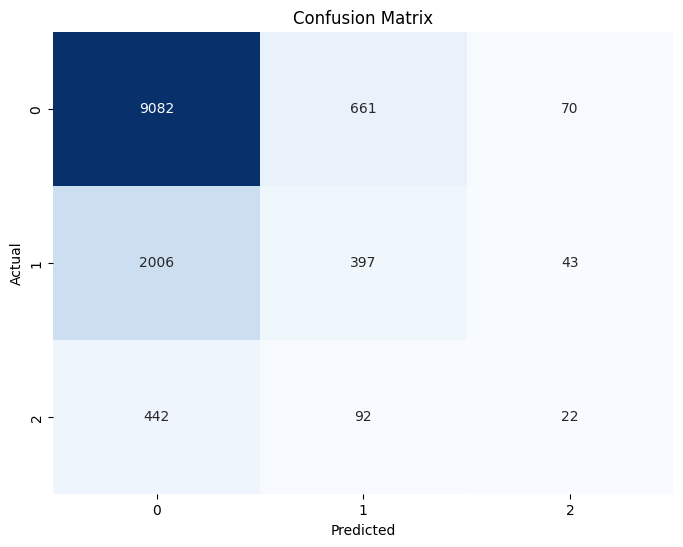

In [120]:
#using grid search to hyper tune the model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  
}

clf = MultinomialNB()

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Extract alpha values and corresponding accuracy scores
alphas = grid_search.cv_results_['param_alpha'].data
accuracies = grid_search.cv_results_['mean_test_score']

# Print the results
print("Alpha values:", alphas)
print("Corresponding Accuracy scores:", accuracies)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix_NB.png")
plt.show()


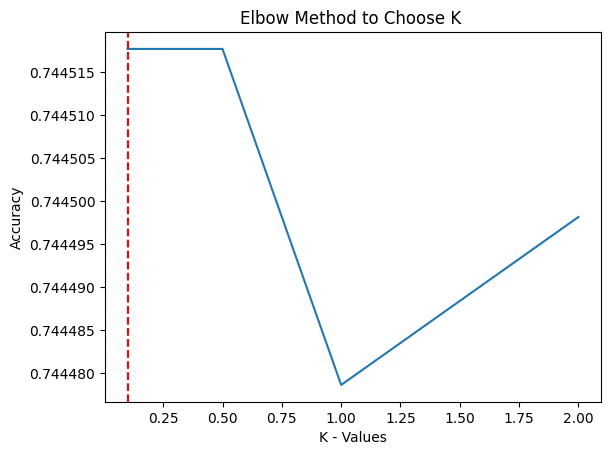

In [121]:
#To get the elbow plot to find the k optimal value
k = range(1,20)

plt.plot(alphas, accuracies)
plt.axvline(x=0.1, color='red', linestyle='--')
 
plt.xlabel("K - Values")
plt.ylabel("Accuracy")
plt.title("Elbow Method to Choose K ")
plt.show()

[Table of contents](#Table-of-Contents)
# KNN<a id="KNN"></a>

K-Nearest Neighbours (KNN) is our choice for predicting patient readmission due to its intuitive and
versatile nature. KNN excels by considering the similarity between patients and making predictions based
on the majority class of their nearest neighbours. This proximity-based approach is highly interpretable and
adapts well to various data patterns. KNN's adaptability makes it a solid choice for a medical context where
understanding patient similarity is crucial. With KNN, we aim to harness the power of patient proximity to
make informed predictions about readmission outcomes, aligning perfectly with our healthcare-focused
problem.

## Original Dataset

## Without Scaling

In [122]:
#To get the X and Y values a
features = df_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_no_scaling['readmitted']

#To train and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [123]:
df_no_scaling.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
0,55.0,1,3,31,1,14,0,0,1,5,...,0,1,1,1,0,0,1,0,0,1
1,55.0,3,2,49,1,11,0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
2,85.0,1,4,68,2,23,0,0,0,9,...,0,0,1,1,0,0,1,0,0,0
3,85.0,1,3,46,0,20,0,0,0,9,...,0,1,1,1,0,0,1,0,0,0
4,35.0,1,5,49,0,5,0,0,0,3,...,0,0,1,1,1,0,0,0,0,0


## choosing K

In [124]:
#To ignore warnings from the code
warnings.filterwarnings('ignore')


In [125]:
#To get the accuracy list of the models with different k values
accuracy_list = []
for k in range(1, 20):
    with warnings.catch_warnings(record=True) as w:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)

 
        if w:
            for warning in w:
                print(f"Warning: {warning.message}")

   
    y_pred = clf.predict(X_test)

 
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(round(accuracy, 2) * 100)

accuracy_list


[65.0,
 74.0,
 72.0,
 75.0,
 74.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0,
 76.0]

## Elbow Plot

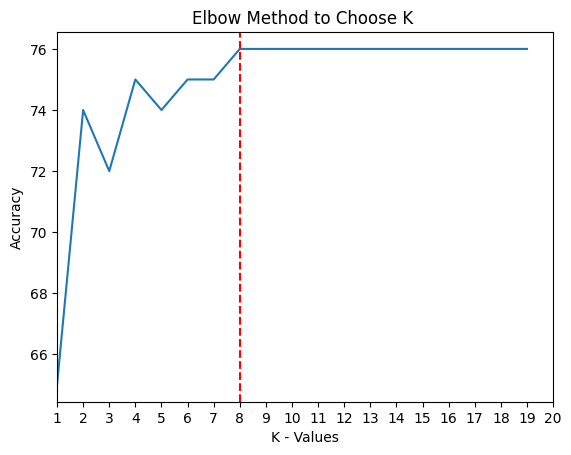

In [126]:
# To get the optimal k value
k = range(1,20)
plt.plot(k, accuracy_list)
plt.axvline(x=8, color='red', linestyle='--')
plt.xlabel("K - Values")
plt.ylabel("Accuracy")
plt.xlim(1, 20)
plt.xticks(range(1, 21)) 
plt.title("Elbow Method to Choose K ")
plt.show()

Choose k =8

In this situation, it's more advisable to stick with the k value that corresponds to the elbow point, which is 8 in this case. This value has already demonstrated a good balance between model complexity and predictive performance. Choosing a higher k value, such as 9, might marginally increase complexity without providing a substantial improvement in accuracy.

### Final Model

In [127]:
#The final model to be used is chosen based on its performance
clf = KNeighborsClassifier(n_neighbors=8)  
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 75.60%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      9813
           1       0.26      0.03      0.06      2446
           2       0.00      0.00      0.00       556

    accuracy                           0.76     12815
   macro avg       0.34      0.34      0.31     12815
weighted avg       0.64      0.76      0.67     12815



# With Scaling

In [128]:
#To get features and taregts
features = df[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df['readmitted']

#To train and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [129]:
#To perform KNN classifier
clf = KNeighborsClassifier(n_neighbors=8) 
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 75.83%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      9813
           1       0.33      0.05      0.09      2446
           2       0.00      0.00      0.00       556

    accuracy                           0.76     12815
   macro avg       0.37      0.34      0.32     12815
weighted avg       0.65      0.76      0.68     12815



# Oversampled Dataset

## Without scaling

In [130]:
#As we are facing class imbalance issue
#We are performing over sampling in the data to try and tackle this issue

#To perform KNN classifier with dataset without scaling
features = df_over_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_over_no_scaling['readmitted']

#To perform train and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


clf = KNeighborsClassifier(n_neighbors=8)  
clf.fit(X_train, y_train)

#To predict 
y_pred = clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 76.10%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      9747
           1       0.72      0.67      0.69      9794
           2       0.84      1.00      0.91      9931

    accuracy                           0.76     29472
   macro avg       0.75      0.76      0.75     29472
weighted avg       0.75      0.76      0.75     29472



## With Scaling

In [131]:
#To perform KNN classifier with dataset with scaling
features = df_oversampled[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_oversampled['readmitted']

#To split train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#To perform the model
clf = KNeighborsClassifier(n_neighbors=8) 
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 76.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.67      9747
           1       0.73      0.66      0.70      9794
           2       0.84      1.00      0.91      9931

    accuracy                           0.77     29472
   macro avg       0.76      0.77      0.76     29472
weighted avg       0.76      0.77      0.76     29472



# Under sample

## Without scaling

In [132]:
#As we are facing class imbalance issue
#We are performing under sampling in the data to try and tackle this issue

#To perform KNN classifier with dataset without scaling
features = df_under_no_scaling[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_under_no_scaling['readmitted']
 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

 
clf = KNeighborsClassifier(n_neighbors=8)   
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

#Model metrics 
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 37.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.50      0.44       562
           1       0.34      0.35      0.35       542
           2       0.39      0.28      0.32       574

    accuracy                           0.38      1678
   macro avg       0.37      0.38      0.37      1678
weighted avg       0.38      0.38      0.37      1678



## With Scaling

In [133]:
#As we are facing class imbalance issue
#We are performing under sampling in the data to try and tackle this issue 
 
#To perform KNN classifier with dataset with scaling    
features = df_undersampled[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_undersampled['readmitted']

#To split train and test 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=8)   
clf.fit(X_train, y_train)

#To predict 
y_pred = clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 39.15%
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.53      0.46       562
           1       0.35      0.32      0.34       542
           2       0.42      0.32      0.37       574

    accuracy                           0.39      1678
   macro avg       0.39      0.39      0.39      1678
weighted avg       0.39      0.39      0.39      1678



# Final model

Accuracy: 76.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.67      9747
           1       0.73      0.66      0.70      9794
           2       0.84      1.00      0.91      9931

    accuracy                           0.77     29472
   macro avg       0.76      0.77      0.76     29472
weighted avg       0.76      0.77      0.76     29472

Accuracy: 76.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.67      9747
           1       0.73      0.66      0.70      9794
           2       0.84      1.00      0.91      9931

    accuracy                           0.77     29472
   macro avg       0.76      0.77      0.76     29472
weighted avg       0.76      0.77      0.76     29472

Macro-Average Sensitivity: 0.77
Macro-Average Specificity: 0.88
Confusion Matrix:
 [[6182 2397 1168]
 [2581 6498  715]
 [   6    0 9925]]


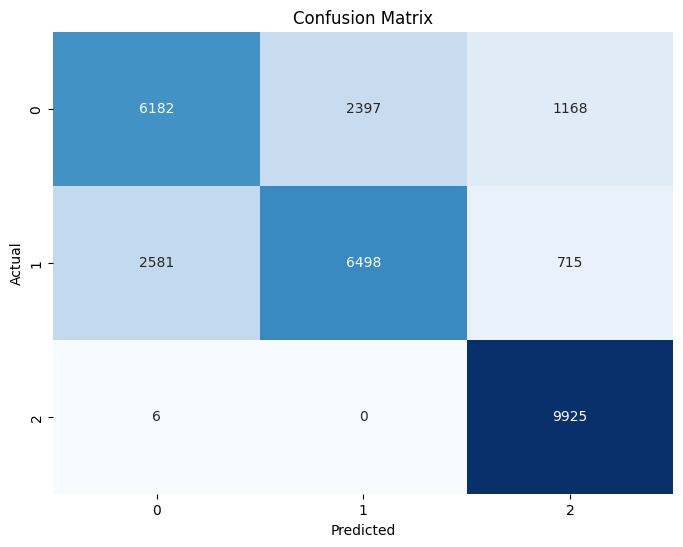

In [134]:
#The final model is chosen based on model metrics
features = df_oversampled[['age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'number_outpatient',
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'examide', 'citoglipton', 'insulin',
                'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone', 'change', 'diabetesMed', 'is_female',
                'race__AfricanAmerican', 'race__Asian', 'race__Caucasian',
                'race__Hispanic', 'race__Other']]

target = df_oversampled['readmitted']

#Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


#Perform the model
clf = KNeighborsClassifier(n_neighbors=8) 
clf.fit(X_train, y_train)

#To predict
y_pred = clf.predict(X_test)

#Model metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, y_pred)

#Additional model metrics
sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))


print("Confusion Matrix:\n", confusion)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix_KNN.png") 
plt.show()

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score #plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [136]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 29.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


[Table of contents](#Table-of-Contents)
# Logistic Regression<a id="Logistic Regression"></a>

# LOGISTIC REGRESSION WITHOUT REGULARIZATION <a id="Logistic Regression"></a>

Logistic Regression without regularization is advantageous due to its interpretability, simplicity, and
computational efficiency. With fewer hyperparameters, it is simpler to implement and less prone to
overfitting. The model's coefficients directly indicate feature importance, aiding in straightforward
interpretation. Logistic Regression without regularization does not assume feature independence, making
it applicable to datasets with correlated predictors. While regularization is valuable in certain contexts, the
non-regularized variant is preferred when transparency and simplicity are prioritized which are important
in healthcare.

## Un-Scaled Normal Data

Un-Scaled Normal Data
Accuracy: 76.59%
Macro-Average Sensitivity: 0.35
Macro-Average Specificity: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.46      0.03      0.06      2446
           2       0.26      0.01      0.03       556

    accuracy                           0.77     12815
   macro avg       0.50      0.35      0.32     12815
weighted avg       0.69      0.77      0.68     12815



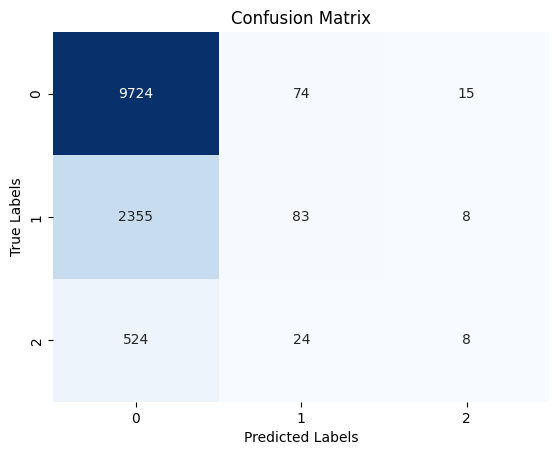

In [137]:
df = pd.read_csv("cleaned_data_unscaled.csv")

X = df.drop(columns=['readmitted'])
y = df['readmitted'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model without regularization
logreg = LogisticRegression(penalty='none', C=0.01, random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

## Un-Scaled and Oversampled Data

Un-Scaled and Oversampled Data
Accuracy: 44.14%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      9747
           1       0.40      0.30      0.35      9794
           2       0.45      0.44      0.44      9931

    accuracy                           0.44     29472
   macro avg       0.44      0.44      0.43     29472
weighted avg       0.44      0.44      0.43     29472



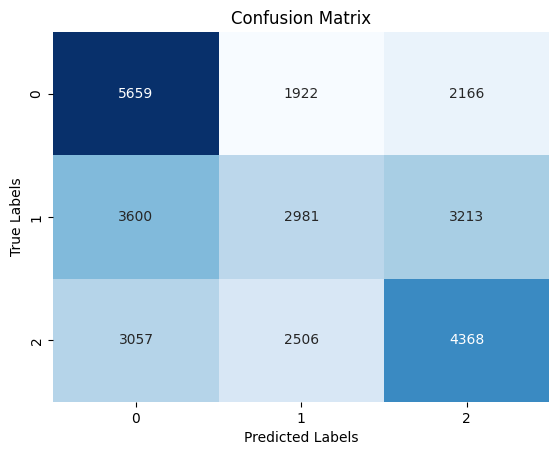

In [138]:
df = pd.read_csv("cleaned_data.csv")

#Oversampling Data
class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

# Find the class with the maximum number of samples
max_class = max(len(class_0), len(class_1), len(class_2))

# Oversample the minority classes
class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

# Concatenate the oversampled DataFrames
df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted'])
y = df_oversampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='none', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled and Oversampled Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Un-Scaled and Undersampled Data

Un-Scaled and Oversampled Data
Accuracy: 43.86%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       562
           1       0.40      0.29      0.33       542
           2       0.43      0.45      0.44       574

    accuracy                           0.44      1678
   macro avg       0.43      0.44      0.43      1678
weighted avg       0.43      0.44      0.43      1678



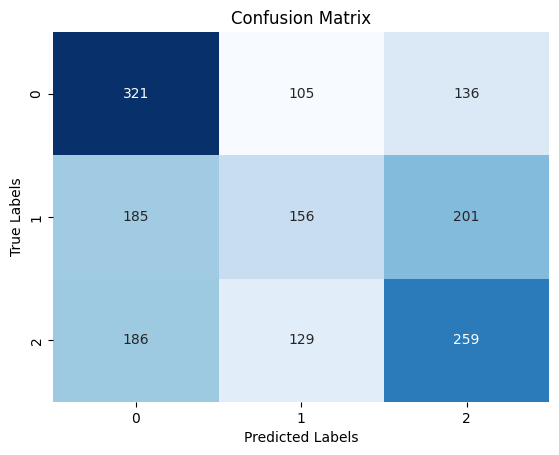

In [139]:
df = pd.read_csv("cleaned_data_unscaled.csv")

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted']) 
y = df_undersampled['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='none', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled and Oversampled Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))


print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled Normal Data

Un-Scaled and Oversampled Data
Accuracy: 76.47%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.41      0.03      0.06      2446
           2       0.33      0.01      0.01       556

    accuracy                           0.76     12815
   macro avg       0.50      0.34      0.31     12815
weighted avg       0.68      0.76      0.67     12815



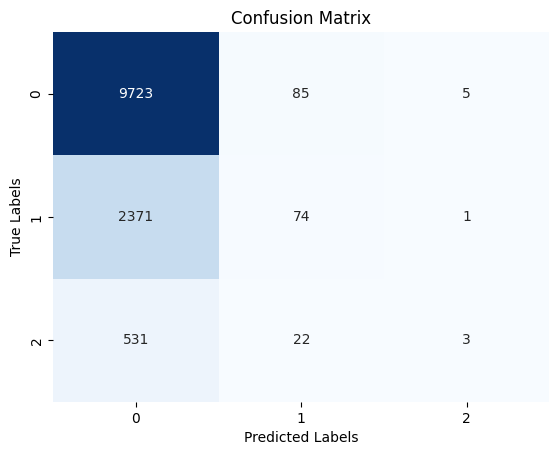

In [140]:
df = pd.read_csv("cleaned_data.csv")

X = df.drop(columns=['readmitted']) 
y = df['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='none', C=0.01, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled and Oversampled Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))


print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Oversampled Data

Un-Scaled Normal Data
Accuracy: 44.14%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      9747
           1       0.40      0.30      0.35      9794
           2       0.45      0.44      0.44      9931

    accuracy                           0.44     29472
   macro avg       0.44      0.44      0.43     29472
weighted avg       0.44      0.44      0.43     29472



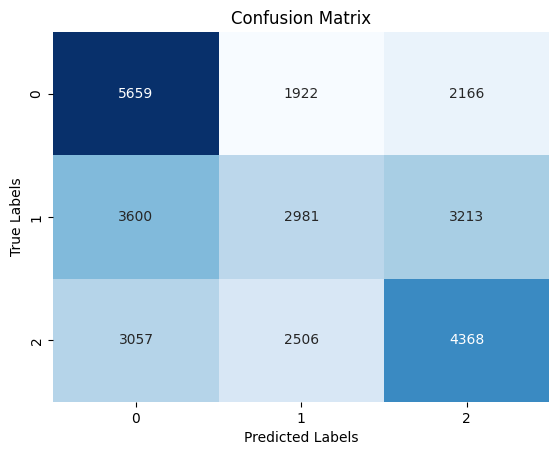

In [141]:
df = pd.read_csv("cleaned_data.csv")

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted'])
y = df_oversampled['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='none', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Undersampled Data

Un-Scaled Normal Data
Accuracy: 42.25%
Macro-Average Sensitivity: 0.42
Macro-Average Specificity: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       562
           1       0.38      0.29      0.33       542
           2       0.41      0.40      0.41       574

    accuracy                           0.42      1678
   macro avg       0.42      0.42      0.41      1678
weighted avg       0.42      0.42      0.42      1678



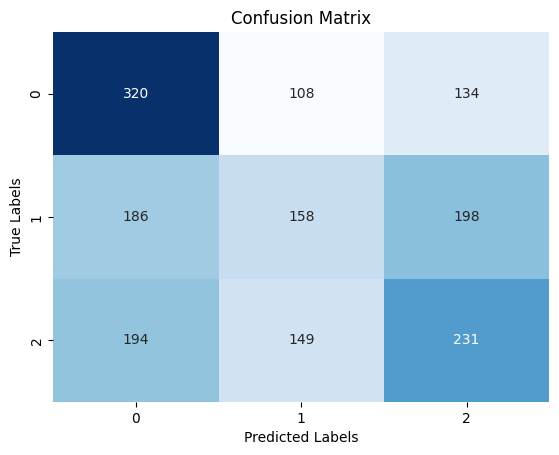

In [142]:
df = pd.read_csv("cleaned_data.csv")

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted']) 
y = df_undersampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='none', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

[Table of contents](#Table-of-Contents)
# LOGISTIC REGRESSION WITH REGULARIZATION

Logistic Regression with regularization (Lasso, Ridge, and Elastic Net) is a popular choice in healthcare
for several reasons:


**Interpretability:**
Logistic Regression is a linear model that provides interpretable coefficients, allowing healthcare
professionals to understand the impact of each feature on the predicted outcome. This interpretability is
crucial in healthcare, where decisions can have significant consequences.


**Probability Interpretation:**
Logistic Regression models output probabilities, making it easier to interpret predictions as the likelihood
of a particular outcome. This probability interpretation is beneficial in healthcare applications, where
knowing the confidence of a prediction can be crucial for decision-making.


**Feature Importance:**
Regularized Logistic Regression (Lasso, Ridge, and Elastic Net) introduces regularization terms that
penalize large coefficients, encouraging the model to select important features and disregard less relevant
ones. This feature selection property can be advantageous in healthcare, where identifying key predictors
is essential for accurate diagnoses or prognosis.


**Avoidance of Overfitting:**
Regularization techniques like Lasso, Ridge, and Elastic Net help prevent overfitting by adding penalty
terms to the model's objective function. Overfitting is a common concern in healthcare due to the
complexity and noise in medical data, and regularization helps ensure the model generalizes well to new,
unseen data.


**Dealing with Multicollinearity:**
In healthcare datasets, it's common for features to be correlated. Regularized Logistic Regression methods,
especially Ridge, can handle multicollinearity by dampening the impact of highly correlated features. This
is important for maintaining model stability and reliability in healthcare applications.


**Flexibility with Elastic Net:**
Elastic Net combines both L1 (Lasso) and L2 (Ridge) regularization, providing a balance between feature
selection and handling multicollinearity. This flexibility can be advantageous in healthcare datasets, which
often exhibit a mix of sparse and correlated features.


**Control over Model Complexity:**
The regularization parameters in Lasso, Ridge, and Elastic Net allow control over the model's complexity.
This is crucial in healthcare, where models should balance capturing the underlying patterns in the data
without becoming overly complex and difficult to interpret.


**Handling Small Sample Sizes:**
Healthcare datasets may be limited in size, and regularization can be beneficial in such scenarios.
Regularized Logistic Regression helps prevent model overfitting, making it more robust when dealing with
smaller datasets.

# LOGISTIC REGRESSION WITH RIDGE REGULARIZATION 

## Normal Un-Scaled Data

Un-Scaled Normal Data
Accuracy: 76.60%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.46      0.03      0.05      2446
           2       0.29      0.01      0.03       556

    accuracy                           0.77     12815
   macro avg       0.50      0.34      0.32     12815
weighted avg       0.69      0.77      0.68     12815



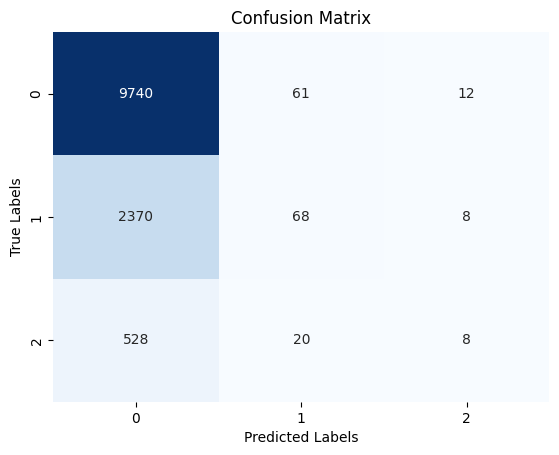

In [143]:
df = pd.read_csv('cleaned_data_unscaled.csv')

X = df.drop(columns=['readmitted']) 
y = df['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l2', C=10, random_state=42)  # 'l2' indicates Ridge regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Un-Scaled and Oversampled Data

Un-Scaled Normal Data
Accuracy: 43.43%
Macro-Average Sensitivity: 0.43
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.56      0.50      9747
           1       0.40      0.31      0.35      9794
           2       0.45      0.43      0.44      9931

    accuracy                           0.43     29472
   macro avg       0.43      0.43      0.43     29472
weighted avg       0.43      0.43      0.43     29472



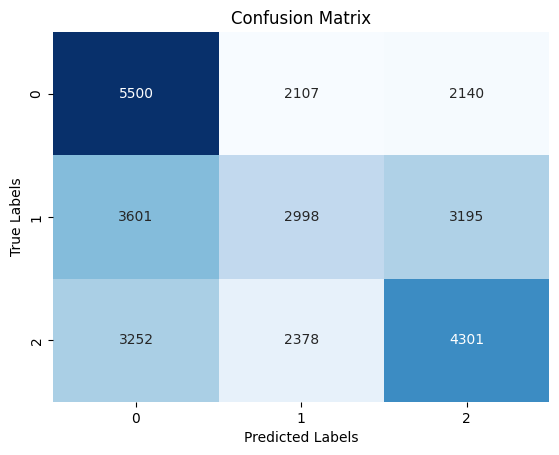

In [144]:
df = pd.read_csv('cleaned_data_unscaled.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted']) 
y = df_oversampled['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l2', random_state=42)  # 'l2' indicates Ridge regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Un-Scaled and Undersampled Data

Un-Scaled Normal Data
Accuracy: 44.16%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.59      0.52       562
           1       0.39      0.29      0.34       542
           2       0.45      0.44      0.44       574

    accuracy                           0.44      1678
   macro avg       0.43      0.44      0.43      1678
weighted avg       0.44      0.44      0.43      1678



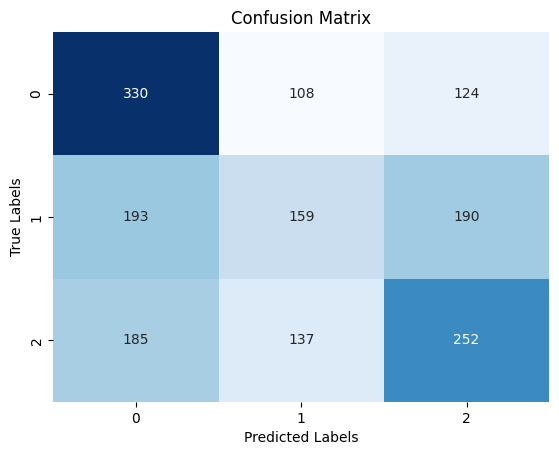

In [145]:
df = pd.read_csv('cleaned_data_unscaled.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

# Undersample the majority class
class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted']) 
y = df_undersampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l2', random_state=42)  # 'l2' indicates Ridge regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Normal Scaled Data

Scaled Normal Data
Accuracy: 76.47%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.41      0.03      0.06      2446
           2       0.33      0.01      0.01       556

    accuracy                           0.76     12815
   macro avg       0.50      0.34      0.31     12815
weighted avg       0.68      0.76      0.67     12815



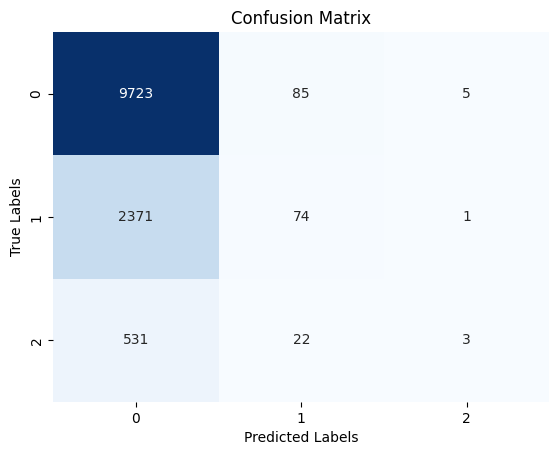

In [146]:
df = pd.read_csv('cleaned_data.csv')

X = df.drop(columns=['readmitted']) 
y = df['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l2', C=10, random_state=42)  # 'l2' indicates Ridge regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Oversampled Data

Un-Scaled Normal Data
Accuracy: 44.14%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      9747
           1       0.40      0.30      0.35      9794
           2       0.45      0.44      0.44      9931

    accuracy                           0.44     29472
   macro avg       0.44      0.44      0.43     29472
weighted avg       0.44      0.44      0.43     29472



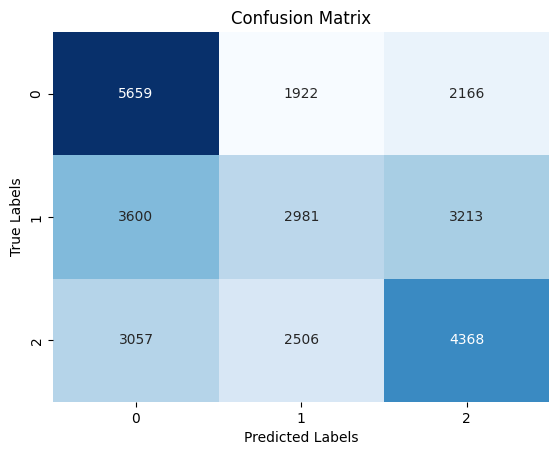

In [147]:
df = pd.read_csv('cleaned_data.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted']) 
y = df_oversampled['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l2', random_state=42)  # 'l2' indicates Ridge regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Undersampled Data

Un-Scaled Normal Data
Accuracy: 42.25%
Macro-Average Sensitivity: 0.42
Macro-Average Specificity: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       562
           1       0.38      0.29      0.33       542
           2       0.41      0.40      0.41       574

    accuracy                           0.42      1678
   macro avg       0.42      0.42      0.41      1678
weighted avg       0.42      0.42      0.42      1678



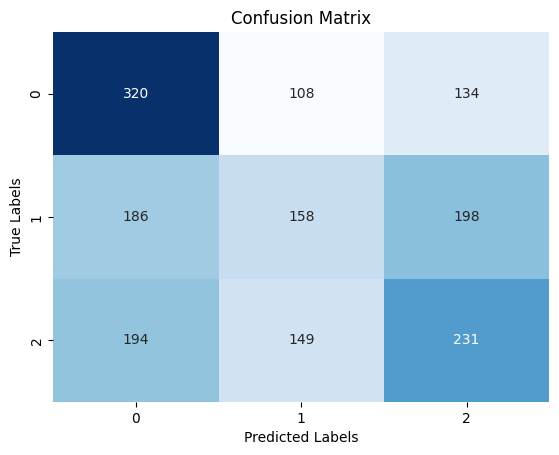

In [148]:
df = pd.read_csv('cleaned_data.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

# Undersample the majority class
class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted']) 
y = df_undersampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l2', random_state=42)  # 'l2' indicates Ridge regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

[Table of contents](#Table-of-Contents)
# LOGISTIC REGRESSION WITH LASSO REGULARIZATION

## Normal Un-Scaled Data

Un-Scaled Normal Data
Accuracy: 76.46%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.40      0.03      0.06      2446
           2       0.00      0.00      0.00       556

    accuracy                           0.76     12815
   macro avg       0.39      0.34      0.31     12815
weighted avg       0.67      0.76      0.67     12815



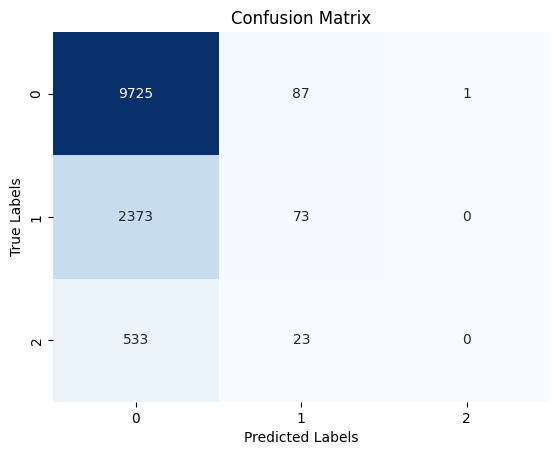

In [149]:
df = pd.read_csv('cleaned_data_unscaled.csv')

X = df.drop(columns=['readmitted'])
y = df['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # 'l1' indicates Lasso regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Un-scaled and Oversampled Data

Un-Scaled Normal Data
Accuracy: 43.97%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      9747
           1       0.40      0.29      0.34      9794
           2       0.45      0.45      0.45      9931

    accuracy                           0.44     29472
   macro avg       0.43      0.44      0.43     29472
weighted avg       0.43      0.44      0.43     29472



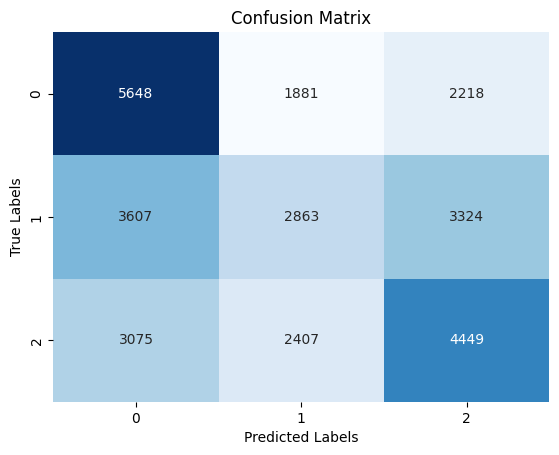

In [150]:
df = pd.read_csv('cleaned_data_unscaled.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted'])
y = df_oversampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # 'l1' indicates Lasso regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Un-Scaled data and Undersampled Data

Un-Scaled Normal Data
Accuracy: 42.73%
Macro-Average Sensitivity: 0.43
Macro-Average Specificity: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51       562
           1       0.40      0.29      0.33       542
           2       0.41      0.41      0.41       574

    accuracy                           0.43      1678
   macro avg       0.42      0.43      0.42      1678
weighted avg       0.42      0.43      0.42      1678



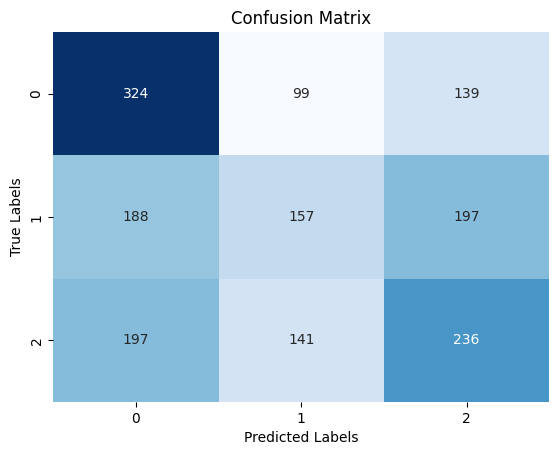

In [151]:
df = pd.read_csv('cleaned_data_unscaled.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

# Undersample the majority class
class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted'])  
y = df_undersampled['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # 'l1' indicates Lasso regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Normal Scaled Data

Un-Scaled Normal Data
Accuracy: 76.46%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.40      0.03      0.06      2446
           2       0.00      0.00      0.00       556

    accuracy                           0.76     12815
   macro avg       0.39      0.34      0.31     12815
weighted avg       0.67      0.76      0.67     12815



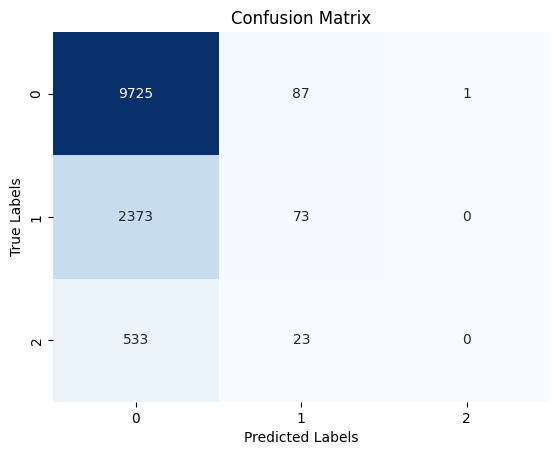

In [152]:
df = pd.read_csv('cleaned_data.csv')

X = df.drop(columns=['readmitted'])
y = df['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # 'l1' indicates Lasso regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Oversampled Data

Un-Scaled Normal Data
Accuracy: 44.01%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      9747
           1       0.40      0.29      0.34      9794
           2       0.45      0.45      0.45      9931

    accuracy                           0.44     29472
   macro avg       0.43      0.44      0.43     29472
weighted avg       0.43      0.44      0.43     29472



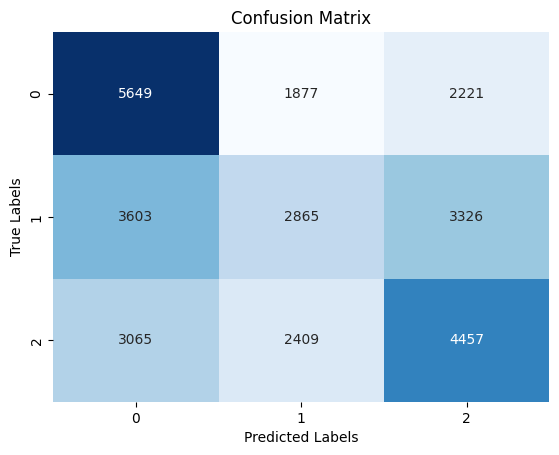

In [153]:
df = pd.read_csv('cleaned_data.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted'])
y = df_oversampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # 'l1' indicates Lasso regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Undersampled Data

Un-Scaled Normal Data
Accuracy: 42.61%
Macro-Average Sensitivity: 0.42
Macro-Average Specificity: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       562
           1       0.39      0.29      0.33       542
           2       0.41      0.41      0.41       574

    accuracy                           0.43      1678
   macro avg       0.42      0.42      0.42      1678
weighted avg       0.42      0.43      0.42      1678



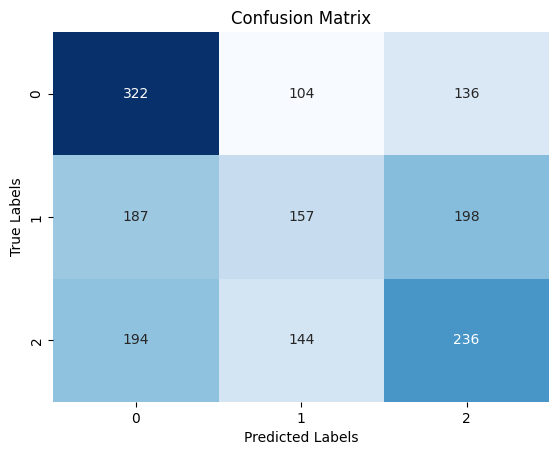

In [154]:
df = pd.read_csv('cleaned_data.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

# Undersample the majority class
class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted'])  
y = df_undersampled['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # 'l1' indicates Lasso regularization

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

[Table of contents](#Table-of-Contents)
# LOGISTIC REGRESSION WITH ELASTIC NET REGULARIZATION

## Normal Un-Scaled Data

Un-Scaled Normal Data
Accuracy: 76.47%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.39      0.03      0.05      2446
           2       0.57      0.01      0.01       556

    accuracy                           0.76     12815
   macro avg       0.58      0.34      0.31     12815
weighted avg       0.69      0.76      0.67     12815



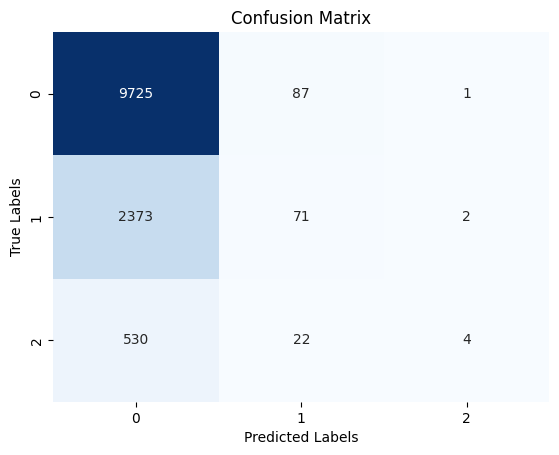

In [155]:
df = pd.read_csv('cleaned_data_unscaled.csv')

X = df.drop(columns=['readmitted'])
y = df['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=42)
# 'elasticnet' indicates Elastic Net regularization
# 'l1_ratio=0.5' balances the L1 (Lasso) and L2 (Ridge) penalties equally
# 'solver='saga'' is used for large datasets and supports both L1 and L2 penalties

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Un-scaled and Oversampled Data

Un-Scaled Normal Data
Accuracy: 44.04%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      9747
           1       0.40      0.30      0.35      9794
           2       0.45      0.44      0.44      9931

    accuracy                           0.44     29472
   macro avg       0.44      0.44      0.43     29472
weighted avg       0.44      0.44      0.43     29472



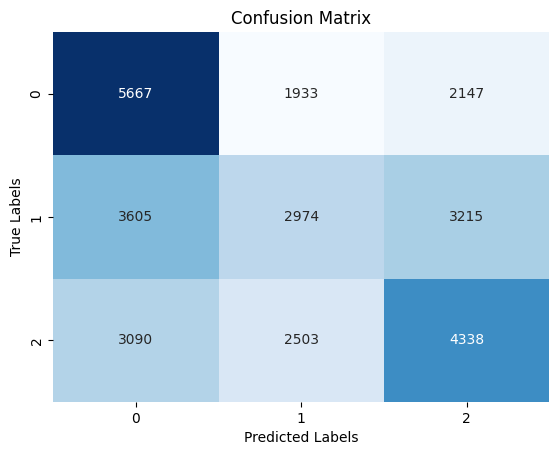

In [156]:
df = pd.read_csv('cleaned_data_unscaled.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted'])  
y = df_oversampled['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Un-scaled and Undersampled Data

Un-Scaled Normal Data
Accuracy: 43.74%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.60      0.53       562
           1       0.39      0.30      0.34       542
           2       0.43      0.41      0.42       574

    accuracy                           0.44      1678
   macro avg       0.43      0.44      0.43      1678
weighted avg       0.43      0.44      0.43      1678



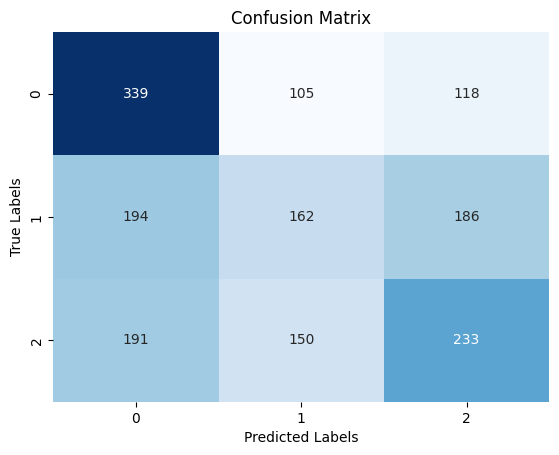

In [157]:
df = pd.read_csv('cleaned_data_unscaled.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted']) 
y = df_undersampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Normal Scaled Data

Un-Scaled Normal Data
Accuracy: 76.47%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9813
           1       0.40      0.03      0.06      2446
           2       0.38      0.01      0.01       556

    accuracy                           0.76     12815
   macro avg       0.52      0.34      0.31     12815
weighted avg       0.68      0.76      0.67     12815



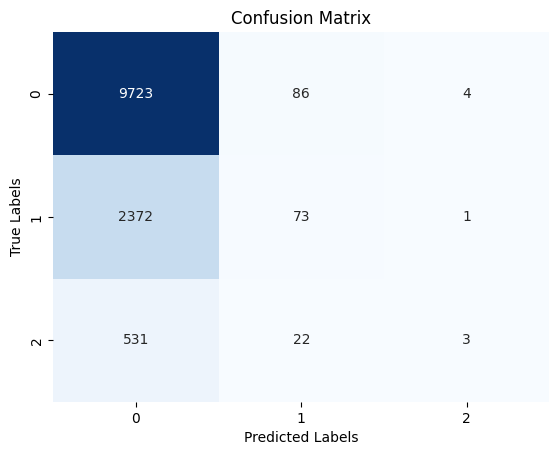

In [158]:
df = pd.read_csv('cleaned_data.csv')

X = df.drop(columns=['readmitted'])
y = df['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=42)
# 'elasticnet' indicates Elastic Net regularization
# 'l1_ratio=0.5' balances the L1 (Lasso) and L2 (Ridge) penalties equally
# 'solver='saga'' is used for large datasets and supports both L1 and L2 penalties

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Oversampled Data

Un-Scaled Normal Data
Accuracy: 44.14%
Macro-Average Sensitivity: 0.44
Macro-Average Specificity: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      9747
           1       0.40      0.30      0.35      9794
           2       0.45      0.44      0.44      9931

    accuracy                           0.44     29472
   macro avg       0.44      0.44      0.43     29472
weighted avg       0.44      0.44      0.43     29472



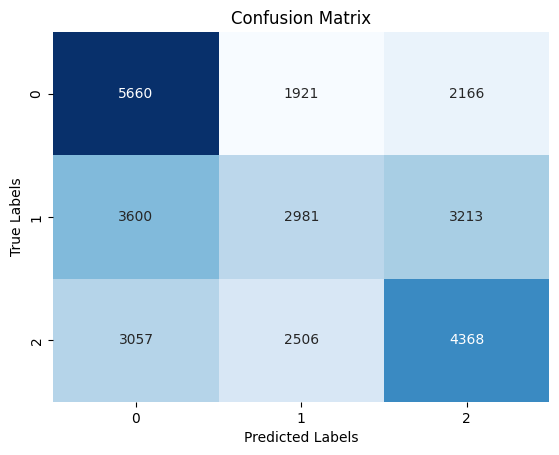

In [159]:
df = pd.read_csv('cleaned_data.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

max_class = max(len(class_0), len(class_1), len(class_2))

class_0_oversampled = resample(class_0, replace=True, n_samples=max_class, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class, random_state=42)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

X = df_oversampled.drop(columns=['readmitted'])  
y = df_oversampled['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Scaled and Undersampled Data

Un-Scaled Normal Data
Accuracy: 42.07%
Macro-Average Sensitivity: 0.42
Macro-Average Specificity: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       562
           1       0.38      0.29      0.33       542
           2       0.41      0.40      0.40       574

    accuracy                           0.42      1678
   macro avg       0.41      0.42      0.41      1678
weighted avg       0.41      0.42      0.41      1678



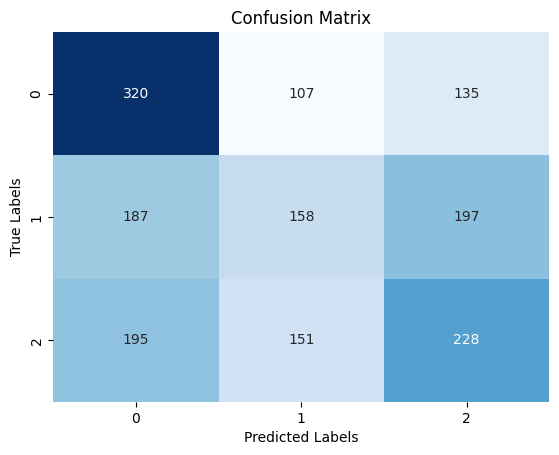

In [160]:
df = pd.read_csv('cleaned_data.csv')

class_0 = df[df['readmitted'] == 0]
class_1 = df[df['readmitted'] == 1]
class_2 = df[df['readmitted'] == 2]

min_class = min(len(class_0), len(class_1), len(class_2))

class_0_undersampled = resample(class_0, replace=False, n_samples=min_class, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_class, random_state=42)
class_2_undersampled = resample(class_2, replace=False, n_samples=min_class, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled, class_2_undersampled])

X = df_undersampled.drop(columns=['readmitted']) 
y = df_undersampled['readmitted'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [161]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


[Table of contents](#Table-of-Contents)
# DECISION TREES USING XGBOOST<a id="DECISION TREES USING XGBOOST"></a>

The choice of the XGBoost model, which is an implementation of the gradient boosting framework,
particularly Decision Trees, is often advantageous in healthcare for several reasons:

    
**Handling Non-linearity:**
Healthcare data is often complex and exhibits non-linear relationships. Decision Trees, especially when
boosted as in XGBoost, can capture intricate non-linear patterns in the data.


**Ensemble Learning:**
XGBoost is an ensemble learning algorithm that combines multiple weak learners (trees) to create a robust,
accurate predictive model. This is beneficial in healthcare where predictions need to be reliable and
accurate.


**Feature Importance:**
XGBoost provides a feature importance score, which can help identify crucial variables influencing the
predictions. In healthcare, understanding feature importance aids in making informed decisions and
interpretations.


**Handling Imbalanced Data:**
Imbalanced datasets are common in healthcare, where certain outcomes may be rare. XGBoost can handle
imbalanced data well, as demonstrated by the classification report showing precision, recall, and F1-score
for each class.


**Model Flexibility:**
XGBoost allows for flexible hyperparameter tuning, enabling optimization for different types of datasets.
This flexibility is crucial in healthcare, where data characteristics can vary widely.

Un-Scaled Normal Data
Accuracy: 76.64%
Macro-Average Sensitivity: 0.34
Macro-Average Specificity: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9813
           1       0.48      0.02      0.04      2446
           2       0.33      0.00      0.00       556

    accuracy                           0.77     12815
   macro avg       0.53      0.34      0.30     12815
weighted avg       0.69      0.77      0.67     12815



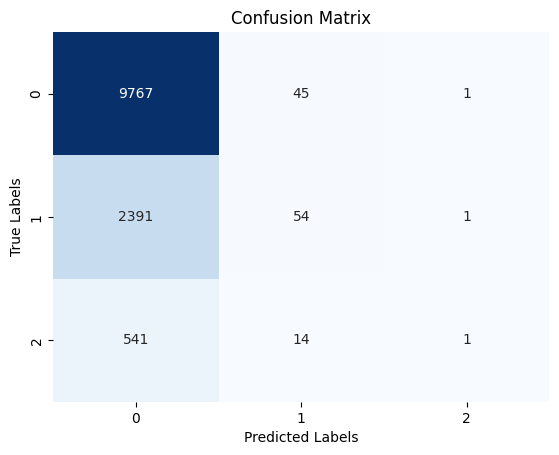

In [162]:
data = pd.read_csv('cleaned_data.csv')

X = data.drop(columns=['readmitted'])
y = data['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

sensitivity = []
specificity = []

for i in range(len(confusion)):
    true_positive = confusion[i, i]
    false_positive = sum(confusion[:, i]) - true_positive
    false_negative = sum(confusion[i, :]) - true_positive
    true_negative = sum(sum(confusion)) - true_positive - false_positive - false_negative

    sensitivity_i = true_positive / (true_positive + false_negative)
    specificity_i = true_negative / (true_negative + false_positive)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

macro_average_sensitivity = sum(sensitivity) / len(sensitivity)
macro_average_specificity = sum(specificity) / len(specificity)

# Print accuracy, classification report, macro sensitivity, and macro specificity
print("Un-Scaled Normal Data")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro-Average Sensitivity: {:.2f}".format(macro_average_sensitivity))
print("Macro-Average Specificity: {:.2f}".format(macro_average_specificity))


print("Classification Report:")
print(classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#xgb.plot_importance(model)
#plt.show()

[Table of contents](#Table-of-Contents)
# Support Vector Machine<a id="Support Vector Machine"></a>


SVC is a powerful machine learning algorithm that can be used for both classification and regression tasks.
It works by finding a hyperplane that separates the data points into two classes.
To improve the performance of the SVC model, we performed hyperparameter tuning. Hyperparameter
tuning is the process of finding the optimal values for the hyperparameters of a machine learning model.


We used a grid search to tune the following hyperparameters:


• C: This hyperparameter controls the trade-off between overfitting and underfitting.


• Gamma: This hyperparameter controls the smoothness of the decision boundary.


• Kernel: This projects the input data into a higher-dimensional space. This can be beneficial for
data that is not linearly separable in the input space.

In [163]:
#loading required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score #plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [164]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
0,-0.674378,-0.776894,-0.444286,-0.645105,-0.226553,-0.218631,-0.267525,-0.203188,0.539307,-1.208149,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,1
1,-0.674378,1.662107,-0.779529,0.280996,-0.226553,-0.578969,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,-1.780278,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
2,1.196992,-0.776894,-0.109043,1.258547,0.346569,0.862383,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,-0.904878,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
3,1.196992,-0.776894,-0.444286,0.126646,-0.799675,0.502045,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
4,-1.921958,-0.776894,0.226201,0.280996,-0.799675,-1.299645,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,0.561710,0.936535,2.071202,-0.084384,-1.690034,-0.140656,-0.127822,0


In [165]:
df.shape

(64071, 42)

In [166]:
property_variable = 'readmitted'
X_all = df[[x for x in df.columns if x != property_variable]].values
Y_all = df[property_variable].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [167]:
param_grid = [
    {'C' : [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
]

cv = ShuffleSplit(n_splits=10, test_size=0.15)

In [168]:
best_params = []
for i in range(5):
    idx = np.random.choice(range(len(X_train)), 200)
    X_selected = X_train[idx]
    Y_selected = Y_train[idx]

    optimal_params = GridSearchCV(SVC(), param_grid, cv = cv, verbose =1)
    optimal_params.fit(X_selected, Y_selected.reshape(-1))
    best_params.append(optimal_params.best_params_)
    print(best_params[-1])

Fitting 10 folds for each of 96 candidates, totalling 960 fits
{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}


In [169]:
unique_list = []
for i in best_params:
    if i not in unique_list:
        unique_list.append(i)

Fitting for Best Parameters : {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix : 
 [[9765    7    0]
 [2449   10    0]
 [ 582    2    0]]
Fitting for Best Parameters : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Confusion Matrix : 
 [[9221  485   66]
 [2314  129   16]
 [ 545   35    4]]
Fitting for Best Parameters : {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}
Confusion Matrix : 
 [[9741   27    4]
 [2434   25    0]
 [ 576    7    1]]


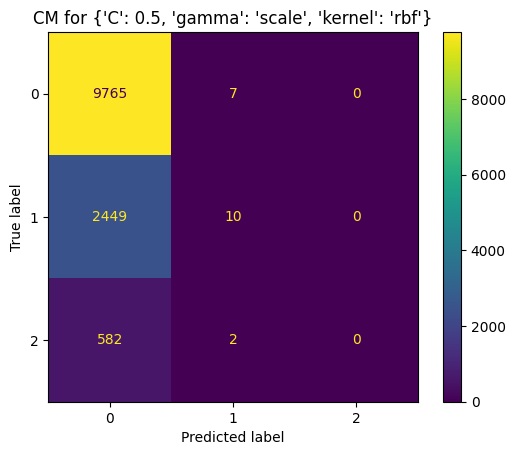

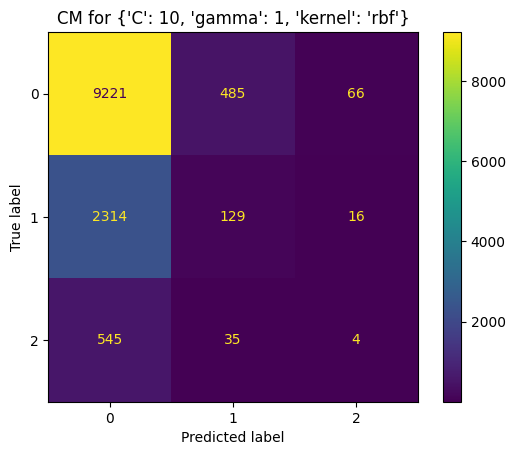

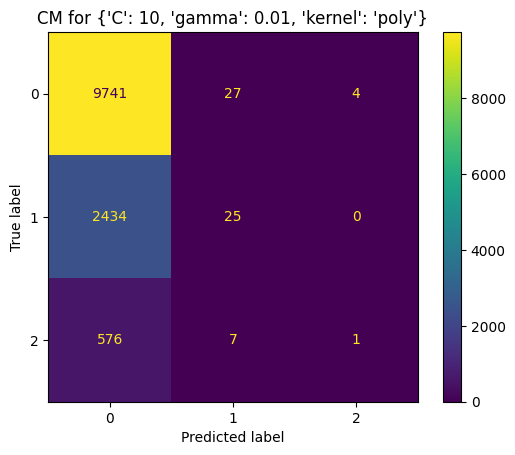

In [170]:
for best_parameters in unique_list:
    print(f'Fitting for Best Parameters : {best_parameters}')
    svc = SVC(C = best_parameters['C'], gamma=best_parameters['gamma'], kernel=best_parameters['kernel']).fit(X_train, Y_train.reshape(-1))
    y_pred = svc.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred) 
    print ("Confusion Matrix : \n", cm) 

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'CM for {best_parameters}')

[Table of contents](#Table-of-Contents)
# Random Forest<a id="Random Forest"></a>

Random forest is a relatively robust algorithm to class imbalance, meaning that it can still perform well
even when the dataset is heavily imbalanced in favour of one class. This is because random forest uses a
technique called bootstrap aggregation, which samples the training data with replacement. This means that
each tree in the forest is trained on a different subset of the data, which reduces the likelihood of overfitting
to the majority class. Along with that Random Forest classification is a relatively robust algorithm, and it
is not prone to overfitting. It is also relatively efficient to train, even on large datasets.

In [171]:
#loading required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score #plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

In [172]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-pioglitazone,change,diabetesMed,is_female,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,readmitted
0,-0.674378,-0.776894,-0.444286,-0.645105,-0.226553,-0.218631,-0.267525,-0.203188,0.539307,-1.208149,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,1
1,-0.674378,1.662107,-0.779529,0.280996,-0.226553,-0.578969,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,-1.780278,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
2,1.196992,-0.776894,-0.109043,1.258547,0.346569,0.862383,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,-0.904878,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
3,1.196992,-0.776894,-0.444286,0.126646,-0.799675,0.502045,-0.267525,-0.203188,-0.468449,0.820185,...,-0.003951,1.105122,0.561710,0.936535,-0.482811,-0.084384,0.591704,-0.140656,-0.127822,0
4,-1.921958,-0.776894,0.226201,0.280996,-0.799675,-1.299645,-0.267525,-0.203188,-0.468449,-2.222316,...,-0.003951,-0.904878,0.561710,0.936535,2.071202,-0.084384,-1.690034,-0.140656,-0.127822,0


In [173]:
df.shape

(64071, 42)

In [174]:
df['readmitted'].value_counts()

readmitted
0    49120
1    12155
2     2796
Name: count, dtype: int64

In [175]:
property_variable = 'readmitted'
X_all = df[[x for x in df.columns if x != property_variable]].values
Y_all = df[property_variable].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [176]:
param_grid = {
    'n_estimators': [80, 90, 100, 110, 120, 150],
    'max_depth': [8, 10, 12, 15]
}

cv = ShuffleSplit(n_splits=10, test_size=0.15)

In [177]:
optimal_params = GridSearchCV(RandomForestClassifier(), param_grid, cv = cv, verbose =1)
optimal_params.fit(X_train, Y_train.reshape(-1))
best_params = optimal_params.best_params_
print(best_params)
parameters_HT_df = pd.DataFrame(optimal_params.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by = 'rank_test_score')
parameters_HT_df

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'max_depth': 15, 'n_estimators': 110}


,params,mean_test_score,std_test_score,rank_test_score
21,"{'max_depth': 15, 'n_estimators': 110}",0.769632,0.005008,1
23,"{'max_depth': 15, 'n_estimators': 150}",0.769606,0.005093,2
22,"{'max_depth': 15, 'n_estimators': 120}",0.769554,0.005254,3
19,"{'max_depth': 15, 'n_estimators': 90}",0.769359,0.004578,4
16,"{'max_depth': 12, 'n_estimators': 120}",0.769333,0.005191,5
17,"{'max_depth': 12, 'n_estimators': 150}",0.769307,0.005199,6
20,"{'max_depth': 15, 'n_estimators': 100}",0.769294,0.005154,7
12,"{'max_depth': 12, 'n_estimators': 80}",0.769242,0.005273,8
15,"{'max_depth': 12, 'n_estimators': 110}",0.769229,0.005560,9
6,"{'max_depth': 10, 'n_estimators': 80}",0.769203,0.005198,10


In [178]:
# creating a RF classifier 
clf = RandomForestClassifier(**best_params) 

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, Y_train.reshape(-1,)) 

# performing predictions on the test dataset 
y_pred = clf.predict(X_test) 

# metrics are used to find accuracy or error 
print() 

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(Y_test, y_pred)) 



ACCURACY OF THE MODEL:  0.7658213031603589


Confusion Matrix : 
 [[9775   16    0]
 [2410   39    0]
 [ 570    5    0]]


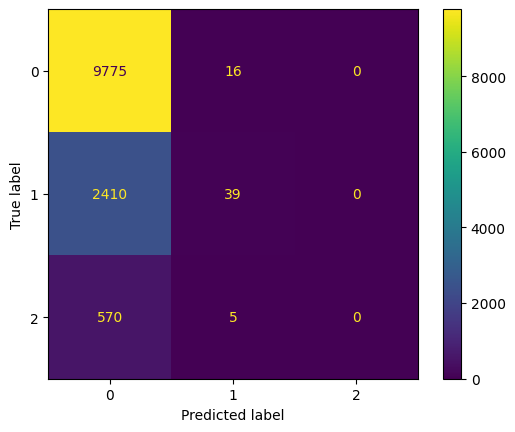

In [179]:
cm = confusion_matrix(Y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [180]:
parameters_HT_df.to_csv('Random_Forest_Hypertuning_Accuracy.csv', index= False)

## Pickling the Model

In [181]:
import pickle 
pickle_out = open("classifier.pkl", "wb") 
pickle.dump(clf, pickle_out) 
pickle_out.close()


[Table of contents](#Table-of-Contents)
# Model Selection<a id="Model Selection"></a>


**1. Model Selection:**

Based on the information provided, the product ended up using the **Random Forest** model for hospital readmission prediction.

* **Robustness to class imbalance:** The dataset used for training might be heavily imbalanced towards non-readmission cases. Random Forest's ability to handle such situations effectively makes it a suitable choice.
* **Resistance to overfitting:** Random Forest's inherent design makes it less prone to overfitting, resulting in a more generalizable model.
* **Computational efficiency:** Even with large datasets, training a Random Forest model is relatively efficient.

**2. Hyperparameter Tuning:**

Two key hyperparameters were tuned for the Random Forest model:

* **Number of estimators (n_estimators):** This controls the number of trees in the forest. A higher value leads to improved accuracy but increased computational cost.
* **Maximum depth (max_depth):** This controls the complexity of each tree. A higher value allows for more complex relationships between features but increases the risk of overfitting.

The values explored for n_estimators were:

* [80, 90, 100, 110, 120, 150]

And for max_depth:

* [8, 10, 12, 15]

This resulted in a total of 24 different hyperparameter combinations evaluated using 10-fold cross-validation.

**3. Best Model Configuration:**

The analysis revealed the following best configuration for the Random Forest model:

* **max_depth**: 15
* **n_estimators**: 150

While this configuration achieved the highest score, the analysis also noted that the mean test scores for other combinations like `max_depth=8` and `n_estimators=100` were similar. This suggests potential for further investigation into using a lower number of estimators for a more efficient model with comparable performance.



[Table of contents](#Table-of-Contents)
## Recommendations and Project Extension Ideas<a id="Recommendations and Project Extension Ideas"></a>

**1. User Learning and Problem Solving:**

* **Risk Prediction:** Users can utilize the product to predict the risk of hospital readmission for individual patients, aiding in informed decision-making about patient care and resource allocation.
* **Improved Risk Assessment:** By comparing individual risk predictions with historical data, users can gain deeper insights into the factors influencing hospital readmission, allowing them to develop more effective prevention strategies.
* **Enhanced Patient Management:** The product can contribute to personalized patient management by identifying high-risk individuals who require closer monitoring and tailored interventions.

**2. Project Extension Ideas:**

* **Feature Engineering:** Identifying and incorporating additional features into the model can potentially improve its accuracy and predictive power.
* **Integration with Electronic Health Records:** Integrating the product with Electronic Health Records (EHRs) could enable seamless access to patient data and streamline the prediction process.

**3. Other Avenues of Exploration:**

* **Exploring alternative data sources:** Investigating and utilizing data from other sources, such as social media or wearable devices, could potentially improve the model's accuracy.
* **Predicting specific readmission causes:** Expanding the model to predict the specific reasons behind potential readmissions could provide even more valuable information for healthcare professionals.
* **Longitudinal analysis:** Analyzing patient data over time could allow for predicting the risk of readmission based on long-term trends and patterns.

These recommendations and project extension ideas offer opportunities to further enhance the product's capabilities and contribute positively to the healthcare domain by improving hospital readmission prediction and patient care.
